# Data checks
- Create a subset of the training data (randomized 100,000 rows for training data set while keeping the index is same for the numerical, categorical and date data)
- Create a subset of the test data (randomized 30,000 rows for the test data set while keeping the index same for the numerical, categorical and date data)
- Missing values
- Identify duplicates
- Identify outliers
- Box plot, IQR, Z score
- Data types that are correct
- Incorrect or impossible values

# Prepare the test dataset

In [1]:
import numpy as np

total_rows = 1184687  # Total rows including header
sample_size = 100000

# Generate a shared random sample of row indices to KEEP (excluding the header row)
rows_to_keep = sorted(np.random.choice(np.arange(1, total_rows), size=sample_size, replace=False))


In [3]:
# All data rows (excluding header) are 1 to total_rows-1
all_rows = set(range(1, total_rows))
rows_to_skip = sorted(all_rows - set(rows_to_keep))


In [5]:
import pandas as pd

def read_aligned_sample(file_path, rows_to_skip):
    return pd.read_csv(file_path, skiprows=rows_to_skip, low_memory=False)

# Read all files using the same rows
sampled_data = {
    'train_numerical': read_aligned_sample('train_numeric.csv', rows_to_skip),
    'train_categorical': read_aligned_sample('train_categorical.csv', rows_to_skip),
    'train_date': read_aligned_sample('train_date.csv', rows_to_skip)
}


In [6]:
# Printing the shape of the sampled numerical, categorical and date data
for key, df in sampled_data.items():
    print(f"{key}: {df.shape}, First ID: {df.iloc[0, 0]}")


train_numerical: (99925, 970), First ID: 47
train_categorical: (99925, 2141), First ID: 47
train_date: (99925, 1157), First ID: 47


In [7]:
import pandas as pd

# Save
pd.Series(rows_to_keep).to_csv("train_rows_to_keep.csv", index=False, header=["row_index"])

# Load back
rows_to_keep_loaded = pd.read_csv("train_rows_to_keep.csv")["row_index"].tolist()


In [8]:
total_rows = 1184687  # adjust to the dataset size (including header row)

# All possible data rows (excluding header row)
all_rows = set(range(1, total_rows))

# Skip everything that is not in rows_to_keep
rows_to_skip = sorted(all_rows - set(rows_to_keep))


In [9]:
preview_files = {
    'train_numerical': 'train_numeric.csv',
    'train_categorical': 'train_categorical.csv',
    'train_date': 'train_date.csv'
}

preview_data = {}
for name, path in preview_files.items():
    preview_data[name] = pd.read_csv(
        path,
        skiprows=rows_to_skip,  # ensure alignment
        nrows=100,              # preview only 100 rows
        low_memory=False
    )
    
# Display nicely in notebook (return df objects)
preview_data['train_numerical'].head()




,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response
0,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,75,0.036,0.056,0.312,0.294,-0.056,-0.066,0.008,0.048,-0.021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,91,0.036,0.101,-0.161,-0.179,-0.100,0.116,-0.015,-0.152,0.316,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [10]:
preview_data['train_categorical'].head()


,Id,L0_S1_F25,L0_S1_F27,L0_S1_F29,L0_S1_F31,L0_S2_F33,L0_S2_F35,L0_S2_F37,L0_S2_F39,L0_S2_F41,...,L3_S49_F4225,L3_S49_F4227,L3_S49_F4229,L3_S49_F4230,L3_S49_F4232,L3_S49_F4234,L3_S49_F4235,L3_S49_F4237,L3_S49_F4239,L3_S49_F4240
0,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
preview_data['train_date'].head()

,Id,L0_S0_D1,L0_S0_D3,L0_S0_D5,L0_S0_D7,L0_S0_D9,L0_S0_D11,L0_S0_D13,L0_S0_D15,L0_S0_D17,...,L3_S50_D4246,L3_S50_D4248,L3_S50_D4250,L3_S50_D4252,L3_S50_D4254,L3_S51_D4255,L3_S51_D4257,L3_S51_D4259,L3_S51_D4261,L3_S51_D4263
0,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,75,1214.71,1214.71,1214.71,1214.71,1214.71,1214.71,1214.71,1214.71,1214.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,91,520.01,520.01,520.01,520.01,520.01,520.01,520.01,520.01,520.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#Count Total NaNs in Each Reduced DataFrame
for name, df in sampled_data.items():
    total_nans = df.isna().sum().sum()
    print(f"Total NaNs in {name}: {total_nans}")


Total NaNs in train_numerical: 78436910
Total NaNs in train_categorical: 208153151
Total NaNs in train_date: 95011320


In [13]:
#Count NaNs Per Column
nan_counts = {}
for name, df in sampled_data.items():
    nan_counts[name] = (
        df.isna().sum()
        .reset_index()
        .rename(columns={"index": "column", 0: "NaN_count"})
    )
nan_counts["train_numerical"]


,column,NaN_count
0,Id,0
1,L0_S0_F0,42736
2,L0_S0_F2,42736
3,L0_S0_F4,42736
4,L0_S0_F6,42736
...,...,...
965,L3_S51_F4256,94929
966,L3_S51_F4258,94929
967,L3_S51_F4260,94929
968,L3_S51_F4262,94929


In [14]:
# NaN counts for categorical 
nan_counts["train_categorical"]


,column,NaN_count
0,Id,0
1,L0_S1_F25,99920
2,L0_S1_F27,99920
3,L0_S1_F29,99920
4,L0_S1_F31,99920
...,...,...
2136,L3_S49_F4234,99924
2137,L3_S49_F4235,99921
2138,L3_S49_F4237,99921
2139,L3_S49_F4239,99924


In [15]:
# NaN counts for date
nan_counts["train_date"]

,column,NaN_count
0,Id,0
1,L0_S0_D1,42736
2,L0_S0_D3,42736
3,L0_S0_D5,42736
4,L0_S0_D7,42736
...,...,...
1152,L3_S51_D4255,94929
1153,L3_S51_D4257,94929
1154,L3_S51_D4259,94929
1155,L3_S51_D4261,94929


In [16]:
#Count Rows With Any or All NaNs
for name, df in sampled_data.items():
    rows_with_any_nan = df.isna().any(axis=1).sum()
    rows_with_all_nan = df.isna().all(axis=1).sum()
    print(f"\n{name}:")
    print(f"  Rows with ≥1 NaN: {rows_with_any_nan}")
    print(f"  Rows with all NaN: {rows_with_all_nan}")



train_numerical:
  Rows with ≥1 NaN: 99925
  Rows with all NaN: 0

train_categorical:
  Rows with ≥1 NaN: 99925
  Rows with all NaN: 0

train_date:
  Rows with ≥1 NaN: 99925
  Rows with all NaN: 0


In [17]:
# Percentage of NaN counts for train_numerical
nan_counts_numeric = (
    sampled_data['train_numerical'].isna().sum()
    .reset_index()
    .rename(columns={"index": "column", 0: "NaN_count"})
)

nan_counts_numeric["NaN_pct"] = nan_counts_numeric["NaN_count"] / len(sampled_data['train_numerical']) * 100
nan_counts_numeric





,column,NaN_count,NaN_pct
0,Id,0,0.000000
1,L0_S0_F0,42736,42.768076
2,L0_S0_F2,42736,42.768076
3,L0_S0_F4,42736,42.768076
4,L0_S0_F6,42736,42.768076
...,...,...,...
965,L3_S51_F4256,94929,95.000250
966,L3_S51_F4258,94929,95.000250
967,L3_S51_F4260,94929,95.000250
968,L3_S51_F4262,94929,95.000250


In [18]:
nan_counts_categorical = (
    sampled_data['train_categorical'].isna().sum()
    .reset_index()
    .rename(columns={"index": "column", 0: "NaN_count"})
)

nan_counts_categorical["NaN_pct"] = nan_counts_categorical["NaN_count"] / len(sampled_data['train_categorical']) * 100
nan_counts_categorical


,column,NaN_count,NaN_pct
0,Id,0,0.000000
1,L0_S1_F25,99920,99.994996
2,L0_S1_F27,99920,99.994996
3,L0_S1_F29,99920,99.994996
4,L0_S1_F31,99920,99.994996
...,...,...,...
2136,L3_S49_F4234,99924,99.998999
2137,L3_S49_F4235,99921,99.995997
2138,L3_S49_F4237,99921,99.995997
2139,L3_S49_F4239,99924,99.998999


In [19]:
nan_counts_date = (
    sampled_data['train_date'].isna().sum()
    .reset_index()
    .rename(columns={"index": "column", 0: "NaN_count"})
)

nan_counts_date["NaN_pct"] = nan_counts_date["NaN_count"] / len(sampled_data['train_date']) * 100
nan_counts_date

,column,NaN_count,NaN_pct
0,Id,0,0.000000
1,L0_S0_D1,42736,42.768076
2,L0_S0_D3,42736,42.768076
3,L0_S0_D5,42736,42.768076
4,L0_S0_D7,42736,42.768076
...,...,...,...
1152,L3_S51_D4255,94929,95.000250
1153,L3_S51_D4257,94929,95.000250
1154,L3_S51_D4259,94929,95.000250
1155,L3_S51_D4261,94929,95.000250


In [20]:
# Average NaNs per row (how many missing values each row has on average) 

nan_avg_per_row_numerical = sampled_data['train_numerical'].isna().sum(axis=1).mean()
nan_avg_per_row_categorical = sampled_data['train_categorical'].isna().sum(axis=1).mean()
nan_avg_per_row_date = sampled_data['train_date'].isna().sum(axis=1).mean()
print("Average NaNs per row numerical:", nan_avg_per_row_numerical.round(2))
print("Average NaNs per row categorical:", nan_avg_per_row_categorical.round(2))
print("Average NaNs per row date:", nan_avg_per_row_date.round(2))

Average NaNs per row numerical: 784.96
Average NaNs per row categorical: 2083.09
Average NaNs per row date: 950.83


## The data checks shows that there is a large number of missing values in the sampled 100,000 data frame for all three files (numerical, categorical, and date).  This will pose a significant issue for logistic regression which is sensitive to NaN or missing values. Must drop rows that have lots of NaNs, and/or use PCA and/or L1 regression that will reduce factors that are not important to zero.

# Prepare the test data set

In [23]:
total_rows_test = 1183748  # Total rows including header
sample_size_test = 30000

# Generate a shared random sample of row indices to KEEP (excluding the header row)
rows_to_keep_test = sorted(np.random.choice(np.arange(1, total_rows_test), size=sample_size_test, replace=False))

In [24]:
# All data rows (excluding header) are 1 to total_rows-1
all_rows = set(range(1, total_rows_test))
rows_to_skip_test = sorted(all_rows - set(rows_to_keep_test))

import pandas as pd

def read_aligned_sample(file_path, rows_to_skip_test):
    return pd.read_csv(file_path, skiprows=rows_to_skip_test, low_memory=False)

# Read all files using the same rows
sampled_data_test = {
    'test_numerical': read_aligned_sample('test_numeric.csv', rows_to_skip_test),
    'test_categorical': read_aligned_sample('test_categorical.csv', rows_to_skip_test),
    'test_date': read_aligned_sample('test_date.csv', rows_to_skip_test)
}

for key, df in sampled_data_test.items():
    print(f"{key}: {df.shape}, First ID: {df.iloc[0, 0]}")

# Save
pd.Series(rows_to_keep_test).to_csv("test_rows_to_keep.csv", index=False, header=["row_index"])

# Load back
rows_to_keep_test_loaded = pd.read_csv("test_rows_to_keep.csv")["row_index"].tolist()

total_rows = 1183748  # adjust to the dataset size (including header row)

# All possible data rows (excluding header row)
all_rows = set(range(1, total_rows_test))

# Skip everything that is not in rows_to_keep
rows_to_skip = sorted(all_rows - set(rows_to_keep_test))

preview_files = {
    'test_numerical': 'test_numeric.csv',
    'test_categorical': 'test_categorical.csv',
    'test_date': 'test_date.csv'
}

preview_data = {}
for name, path in preview_files.items():
    preview_data[name] = pd.read_csv(
        path,
        skiprows=rows_to_skip_test,  # ensure alignment
        nrows=100,              # preview only 100 rows
        low_memory=False
    )
    
# Display nicely in notebook (return df objects for test_numeric)
preview_data['test_numerical'].head()




test_numerical: (30001, 969), First ID: 19
test_categorical: (30001, 2141), First ID: 19
test_date: (30001, 1157), First ID: 19


,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S50_F4243,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262
0,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,111,0.036,0.011,0.312,0.330,-0.056,-0.021,0.015,0.128,-0.067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,171,0.056,0.071,-0.197,-0.179,0.118,0.025,-0.015,-0.112,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 

In [26]:
# Display nicely in notebook (return df objects for test_categorical)
preview_data['test_categorical'].head()



,Id,L0_S1_F25,L0_S1_F27,L0_S1_F29,L0_S1_F31,L0_S2_F33,L0_S2_F35,L0_S2_F37,L0_S2_F39,L0_S2_F41,...,L3_S49_F4225,L3_S49_F4227,L3_S49_F4229,L3_S49_F4230,L3_S49_F4232,L3_S49_F4234,L3_S49_F4235,L3_S49_F4237,L3_S49_F4239,L3_S49_F4240
0,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# Display nicely in notebook (return df objects for test_date)
preview_data['test_date'].head()


,Id,L0_S0_D1,L0_S0_D3,L0_S0_D5,L0_S0_D7,L0_S0_D9,L0_S0_D11,L0_S0_D13,L0_S0_D15,L0_S0_D17,...,L3_S50_D4246,L3_S50_D4248,L3_S50_D4250,L3_S50_D4252,L3_S50_D4254,L3_S51_D4255,L3_S51_D4257,L3_S51_D4259,L3_S51_D4261,L3_S51_D4263
0,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,111,690.43,690.43,690.43,690.43,690.43,690.43,690.43,690.43,690.43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,171,169.36,169.36,169.36,169.36,169.36,169.36,169.36,169.36,169.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## I am able to sample 30001 rows from the test datasets. This will be used as the test data in the test-train split. 

# Exploratory data analysis (EDA)
- Correlation matrix
- Univariate analysis - density, count plots, histograms, summary statistics
- Bivariate analysis - Correlation matrix, scatterplots, box plots
- Multivariate analysis - map different aspects to a chart

In [30]:
print(sampled_data.keys())


dict_keys(['train_numerical', 'train_categorical', 'train_date'])


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

num_df = sampled_data['train_numerical'].copy()
cat_df = sampled_data['train_categorical'].copy()
date_df = sampled_data['train_date'].copy()

# Ensure Id exists and is unique 
for df in [num_df, cat_df, date_df]:
    if 'Id' in df.columns:
        df.set_index('Id', inplace=True)

# Target ('Response' in train_numeric)
target_col = 'Response' if 'Response' in num_df.columns else None


In [32]:
# Numeric summary (exclude Id/target)
num_cols = [c for c in num_df.columns if c != target_col]
num_summary = num_df[num_cols].describe().T
num_missing = num_df[num_cols].isna().mean().sort_values(ascending=False).to_frame('missing_pct')

# Categorical summary (top categories)
cat_cols = cat_df.columns.tolist()
cat_summary = cat_df[cat_cols].describe(include='object').T  # count, unique, top, freq
cat_missing = cat_df[cat_cols].isna().mean().sort_values(ascending=False).to_frame('missing_pct')

display(num_summary.head(10))
display(num_missing.head(10))
display(cat_summary.head(10))
display(cat_missing.head(10))


,count,mean,std,min,25%,50%,75%,max
L0_S0_F0,57189.0,-0.000118,0.080284,-0.421,-0.049,0.003,0.056,0.278
L0_S0_F2,57189.0,-0.000194,0.093015,-0.422,-0.056,0.004,0.063,0.295
L0_S0_F4,57189.0,-0.000666,0.211173,-0.397,-0.179,-0.033,0.294,0.567
L0_S0_F6,57189.0,-0.000634,0.211442,-0.416,-0.179,-0.034,0.294,0.566
L0_S0_F8,57189.0,-0.000357,0.094901,-0.447,-0.056,0.031,0.074,0.292
L0_S0_F10,57189.0,-0.001008,0.165395,-0.612,-0.066,0.070,0.116,0.252
L0_S0_F12,57189.0,-0.000040,0.019402,-0.044,-0.015,0.000,0.015,0.096
L0_S0_F14,57189.0,-0.000321,0.104190,-0.232,-0.072,-0.032,0.088,0.488
L0_S0_F16,57189.0,-0.000157,0.115036,-0.408,-0.082,0.000,0.076,0.484
L0_S0_F18,57189.0,0.000309,0.112640,-0.383,-0.078,0.002,0.077,0.468


,missing_pct
L1_S25_F2187,0.998929
L1_S25_F2190,0.998929
L1_S25_F2193,0.998929
L1_S25_F2196,0.998929
L1_S25_F2199,0.998929
L1_S25_F2202,0.998929
L1_S25_F2181,0.998929
L1_S25_F2184,0.998929
L1_S25_F2608,0.998329
L1_S25_F2637,0.998329


,count,unique,top,freq
L0_S1_F25,5,1,T1,5
L0_S1_F27,5,1,T9,5
L0_S1_F29,5,1,T1,5
L0_S1_F31,5,1,T9,5
L0_S2_F33,19,1,T1,19
L0_S2_F35,19,5,T32,11
L0_S2_F37,19,1,T1,19
L0_S2_F39,19,5,T32,11
L0_S2_F41,19,1,T1,19
L0_S2_F43,19,5,T32,11


,missing_pct
L3_S30_F3783,1.0
L1_S24_F1057,1.0
L1_S24_F1040,1.0
L1_S24_F1042,1.0
L1_S24_F1044,1.0
L1_S24_F1045,1.0
L1_S24_F1047,1.0
L1_S24_F1049,1.0
L1_S24_F1050,1.0
L1_S24_F1052,1.0


## Based on the tables, I noticed that certain stations had a higher frequency of parts passing through that station. For example, station L0_S2_F33 (L0_S2_F33 means the Feature 33 measured at Station 2 on Assembly Line 0) has a frequency of 26. There are many stations, where parts did not pass through at all and this is tabulated with missing_pct at 1.0 (100% missing). These will be dropped before fitting for the logistic regression.  

## Univariate analysis – numeric (histograms & density/KDE). I picked a manageable subset to visualize (top 12 by variance or a manual list).

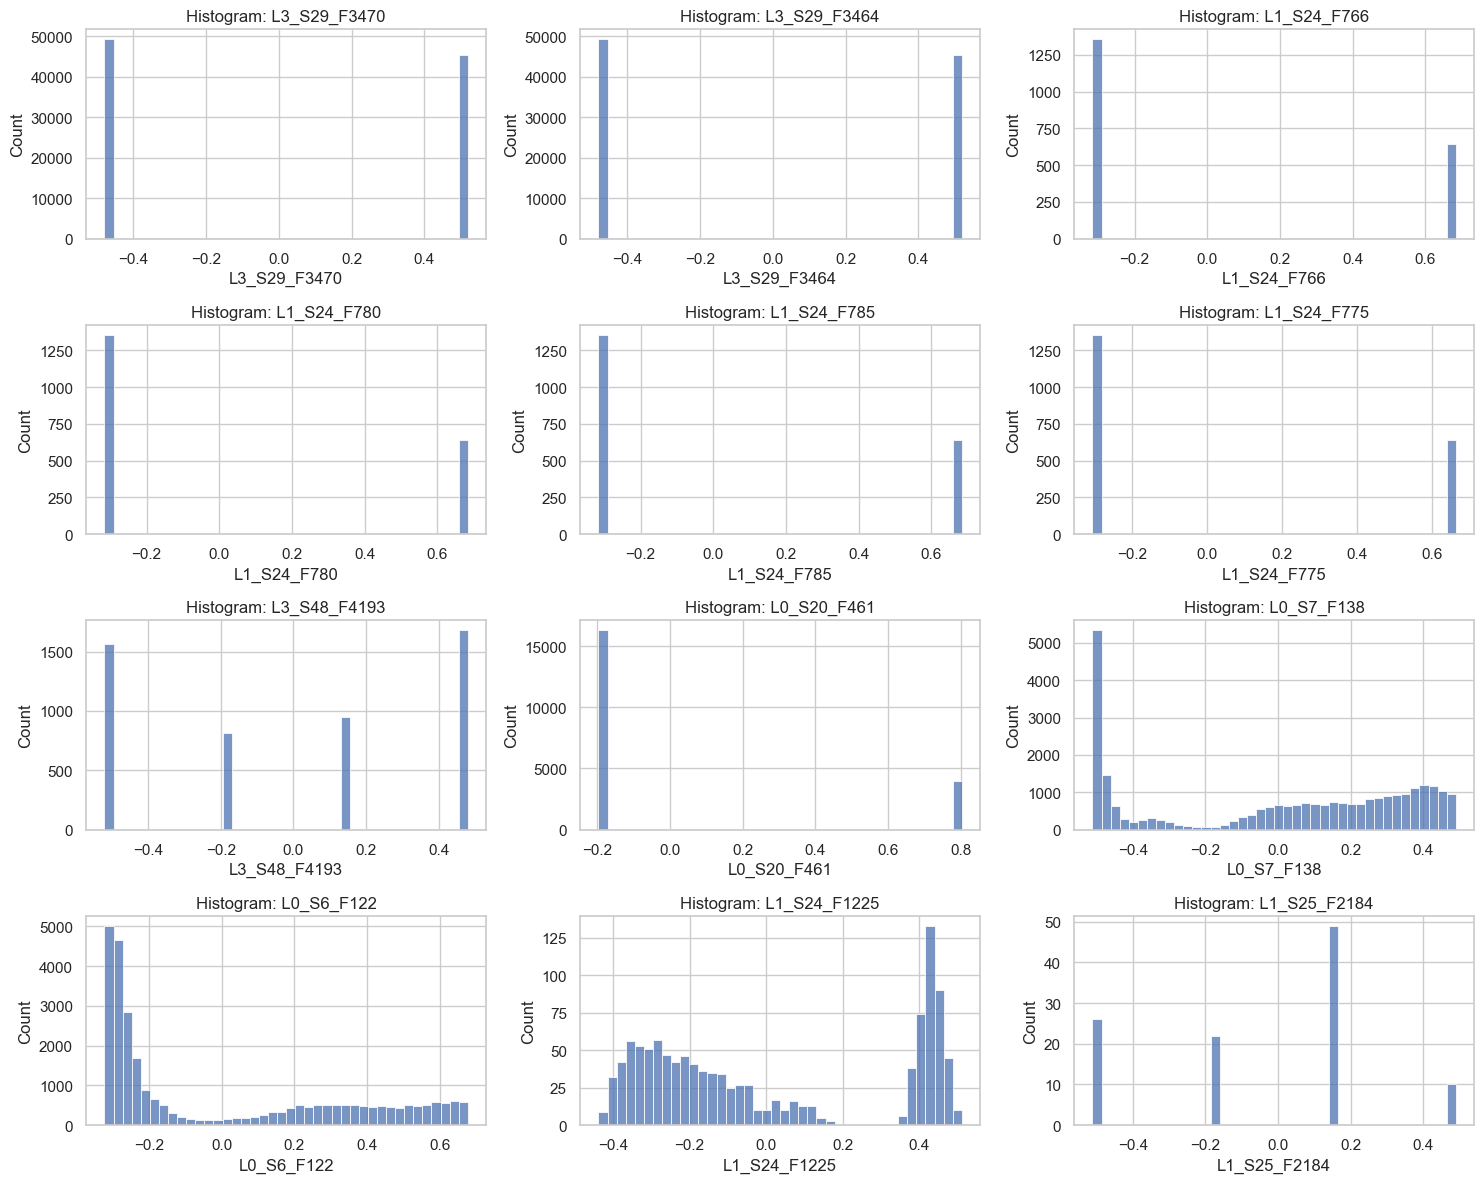

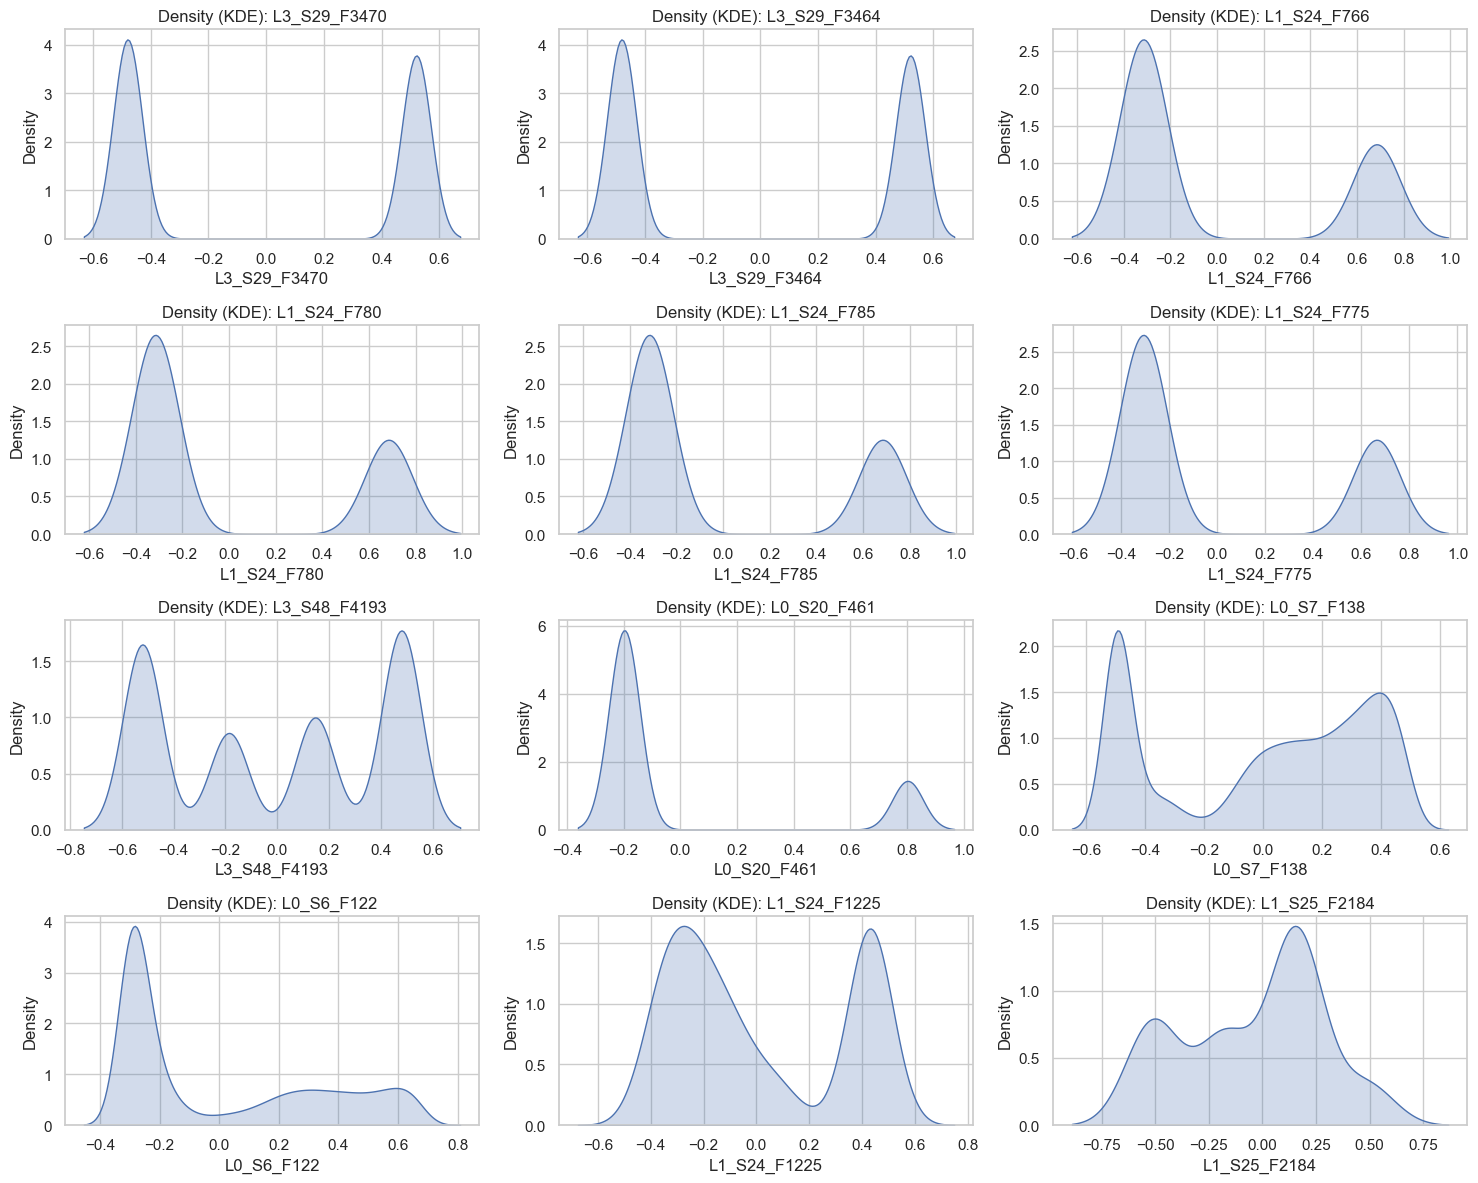

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose numeric columns to visualize: top by variance (excluding target)
var_order = num_df[num_cols].var().sort_values(ascending=False)
top_num_for_plots = var_order.head(12).index.tolist()

# --- Histograms in 4x3 grid ---
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(top_num_for_plots):
    sns.histplot(num_df[col], bins=40, kde=False, ax=axes[i])
    axes[i].set_title(f"Histogram: {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# Hide any unused subplots (in case fewer than 12 features)
for j in range(len(top_num_for_plots), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# --- Density (KDE) in 4x3 grid ---
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(top_num_for_plots):
    sns.kdeplot(num_df[col].dropna(), fill=True, ax=axes[i])
    axes[i].set_title(f"Density (KDE): {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Density")

# Hide unused subplots
for j in range(len(top_num_for_plots), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


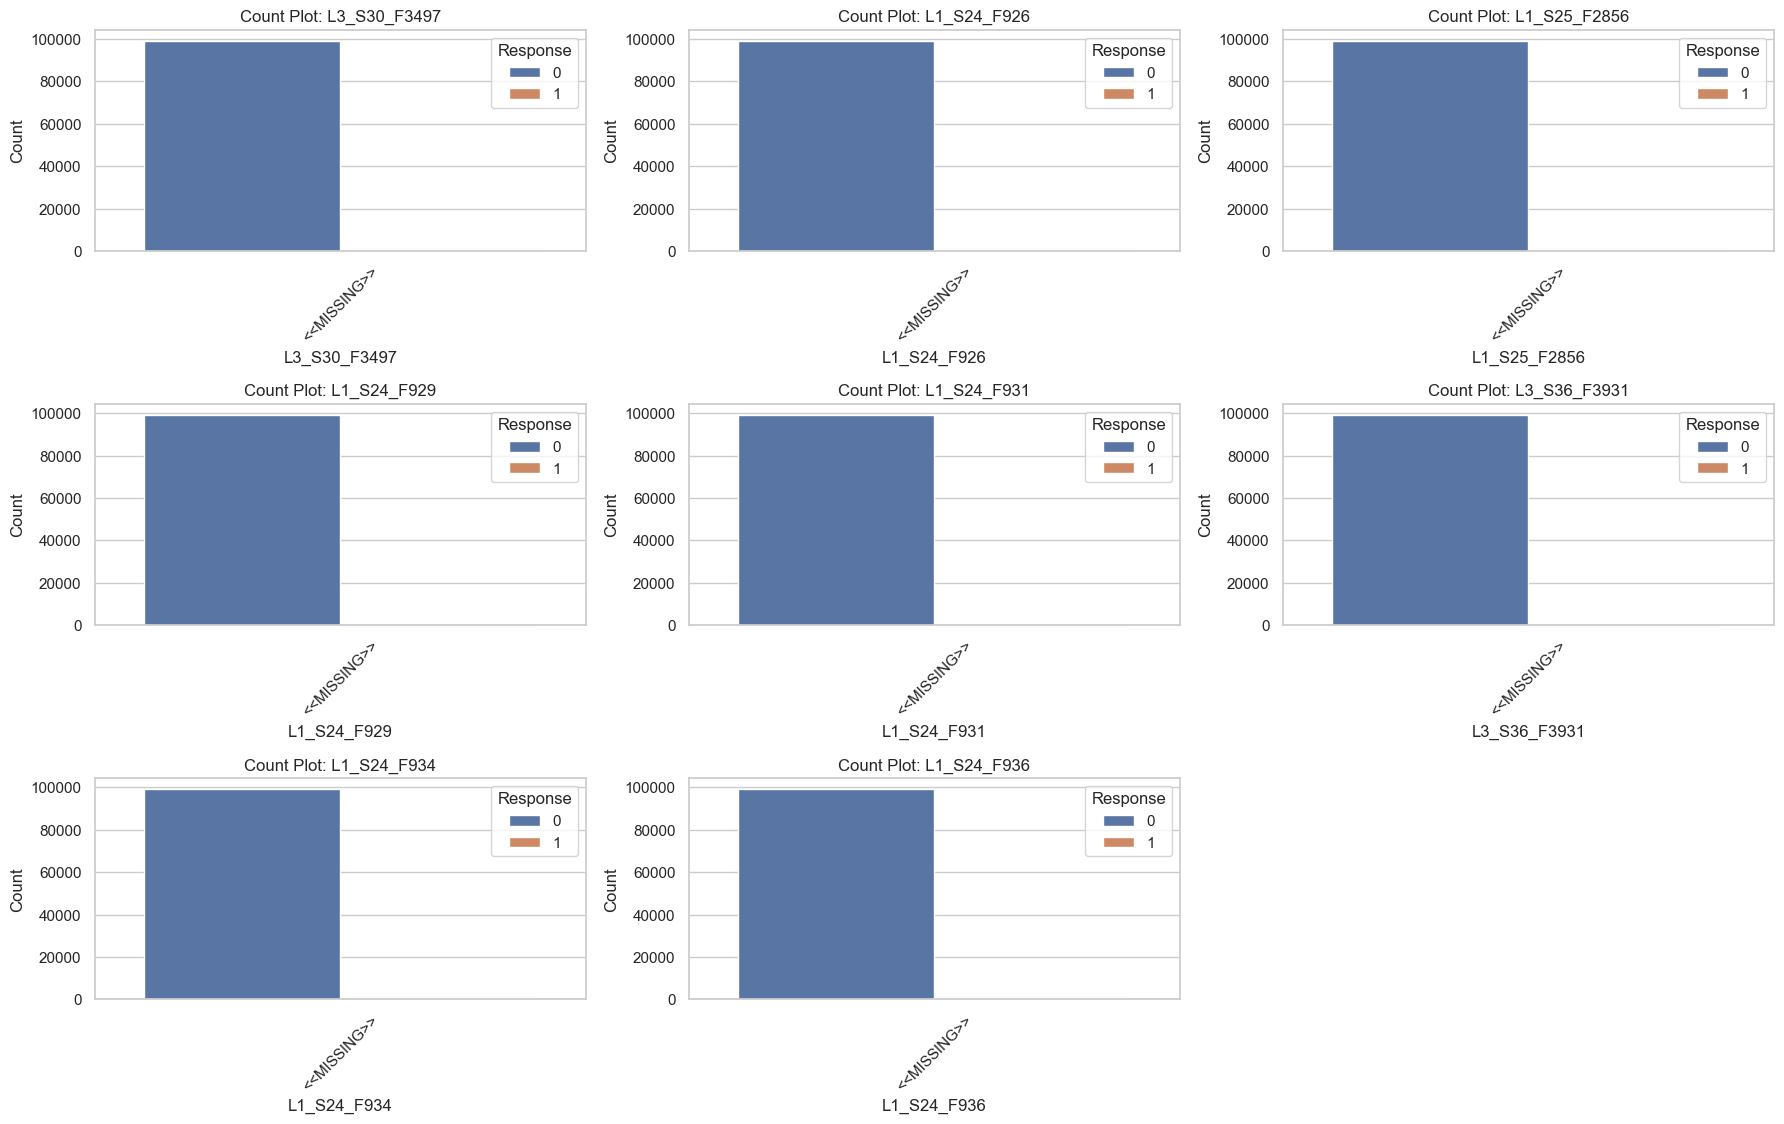

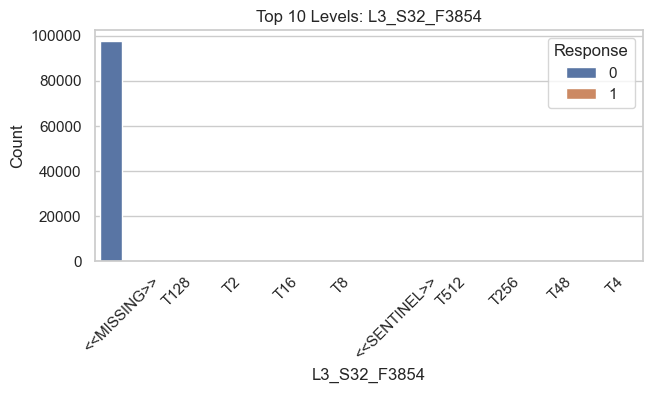

In [60]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Function to clean/sanitize categorical values
def clean_categorical(s: pd.Series) -> pd.Series:
    s = s.astype("string").fillna("<<MISSING>>")
    s = s.str.replace(r"^T-?\d{5,}$", "<<SENTINEL>>", regex=True)
    return s.str.slice(0, 60)


# --- Small-cardinality columns ---
cardinality = cat_df.nunique(dropna=False).sort_values()
cat_for_plots = [c for c in cardinality.index if cardinality[c] <= 15][:8]  # up to 8

fig, axes = plt.subplots(4, 3, figsize=(18, 14))
axes = axes.flatten()

for i, col in enumerate(cat_for_plots):
    col_series = clean_categorical(cat_df[col])
    order = col_series.value_counts(dropna=False).index.tolist()

    if 'Response' in num_df.columns:
        tmp = pd.DataFrame({col: col_series, 'Response': num_df['Response']})
        sns.countplot(data=tmp, x=col, hue='Response', order=order, ax=axes[i])
        axes[i].legend(title="Response")
    else:
        tmp = pd.DataFrame({col: col_series})
        sns.countplot(data=tmp, x=col, order=order, ax=axes[i])

    axes[i].set_title(f"Count Plot: {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

# Hide unused subplots
for j in range(len(cat_for_plots), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# --- High-cardinality columns: top-k only ---
topk = 10
high_card_cols = [c for c in cat_df.columns if cat_df[c].nunique(dropna=False) > 15][:6]

fig, axes = plt.subplots(4, 3, figsize=(18, 14))
axes = axes.flatten()

for i, col in enumerate(high_card_cols):
    col_series = clean_categorical(cat_df[col])
    top_levels = col_series.value_counts(dropna=False).head(topk).index.tolist()
    mask = col_series.isin(top_levels)

    if 'Response' in num_df.columns:
        tmp = pd.DataFrame({col: col_series[mask], 'Response': num_df.loc[mask, 'Response']})
        sns.countplot(data=tmp, x=col, hue='Response', order=top_levels, ax=axes[i])
        axes[i].legend(title="Response")
    else:
        tmp = pd.DataFrame({col: col_series[mask]})
        sns.countplot(data=tmp, x=col, order=top_levels, ax=axes[i])

    axes[i].set_title(f"Top {topk} Levels: {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

# Hide unused subplots
for j in range(len(high_card_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Correlations (numeric)
## Full correlation matrices with thousands of columns are unwieldy. So, I did two things:
- Correlation with the target (absolute value sorted).
- A heatmap slice on the top‐k correlated features (or top variance features).

,corr_with_target,abs_corr
L1_S25_F2707,-0.333767,0.333767
L1_S24_F867,-0.329789,0.329789
L1_S25_F2632,0.289680,0.289680
L1_S25_F2662,0.239592,0.239592
L1_S24_F1723,-0.228799,0.228799
L1_S25_F2637,0.225925,0.225925
L1_S25_F2657,-0.215616,0.215616
L1_S25_F2741,-0.159433,0.159433
L1_S25_F2504,-0.159397,0.159397
L1_S25_F2692,0.153481,0.153481


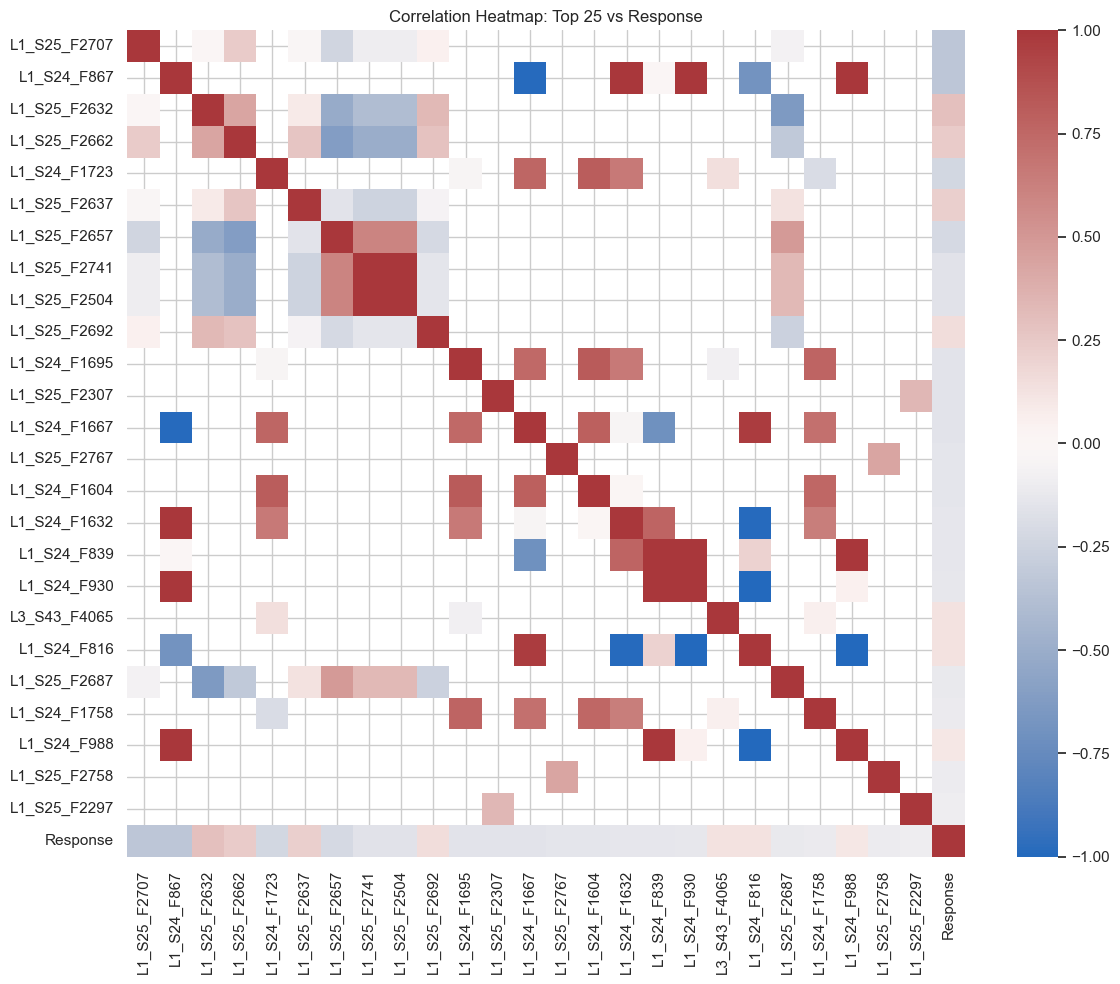

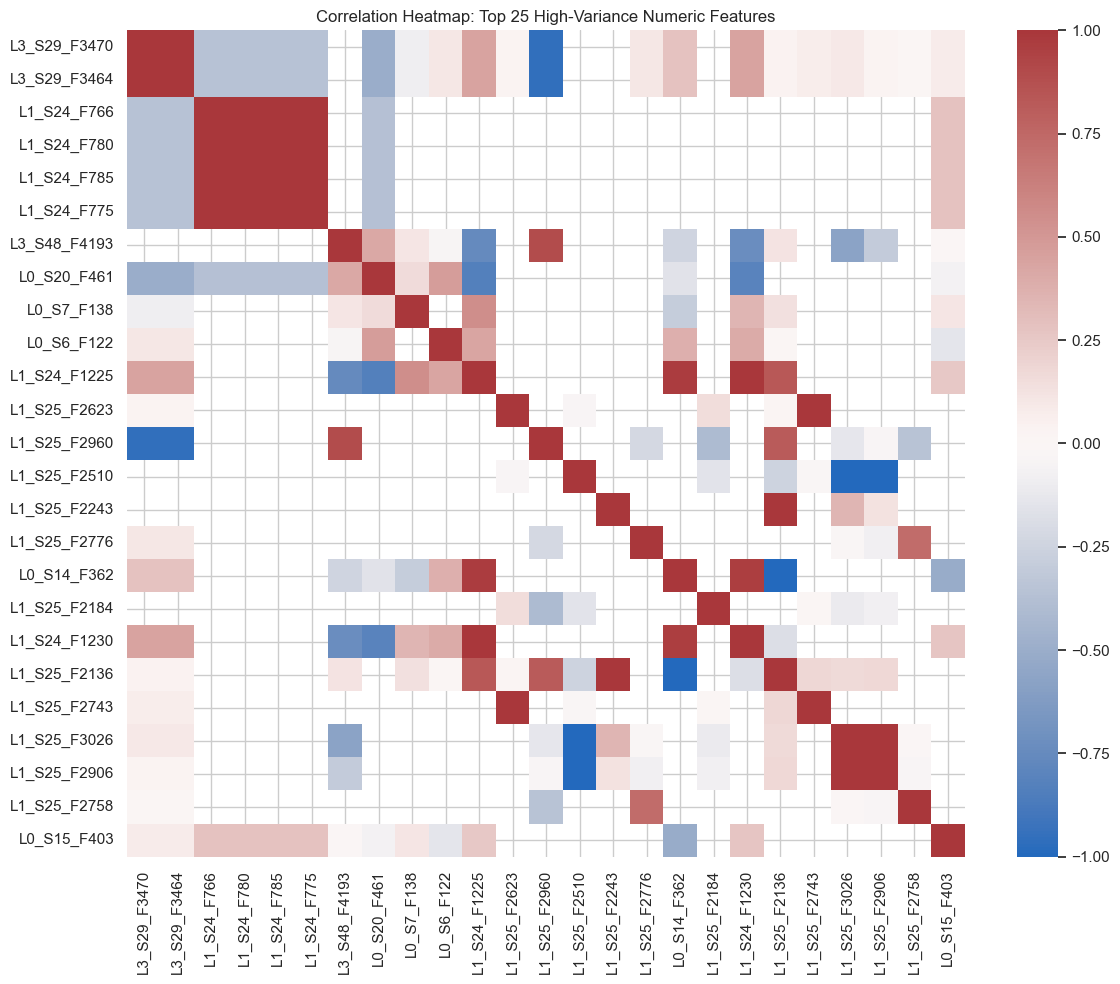

In [40]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) #ignore some warnings where numbers are divided by NaN

# Correlation with target
if target_col is not None:
    # Pearson (fast); Spearman is robust to monotonic but slower
    target_corr = num_df[num_cols].corrwith(num_df[target_col]).dropna().to_frame('corr_with_target')
    target_corr['abs_corr'] = target_corr['corr_with_target'].abs()
    target_corr = target_corr.sort_values('abs_corr', ascending=False)
    display(target_corr.head(30))

    # Heatmap for top-k correlated features (plus target)
    topk = 25
    top_feats = target_corr.head(topk).index.tolist()
    corr_slice = num_df[top_feats + [target_col]].corr()

    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_slice, annot=False, cmap="vlag", center=0)
    plt.title(f"Correlation Heatmap: Top {topk} vs {target_col}")
    plt.tight_layout()
    plt.show()

# Heatmap for a high-variance subset (if no target or additionally)
hv_topk = 25
hv_cols = var_order.head(hv_topk).index.tolist()
corr_hv = num_df[hv_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_hv, annot=False, cmap="vlag", center=0)
plt.title(f"Correlation Heatmap: Top {hv_topk} High-Variance Numeric Features")
plt.tight_layout()
plt.show()


## The correlation heatmap shows strong correlation between some features in Line1 Station 24 for features 766, 780, 785 and 775 for the high variance. In the top 25, there are high negative correlation for F2906 and F2925 all from Line1 and Station 25 suggesting some inverse correlation. 

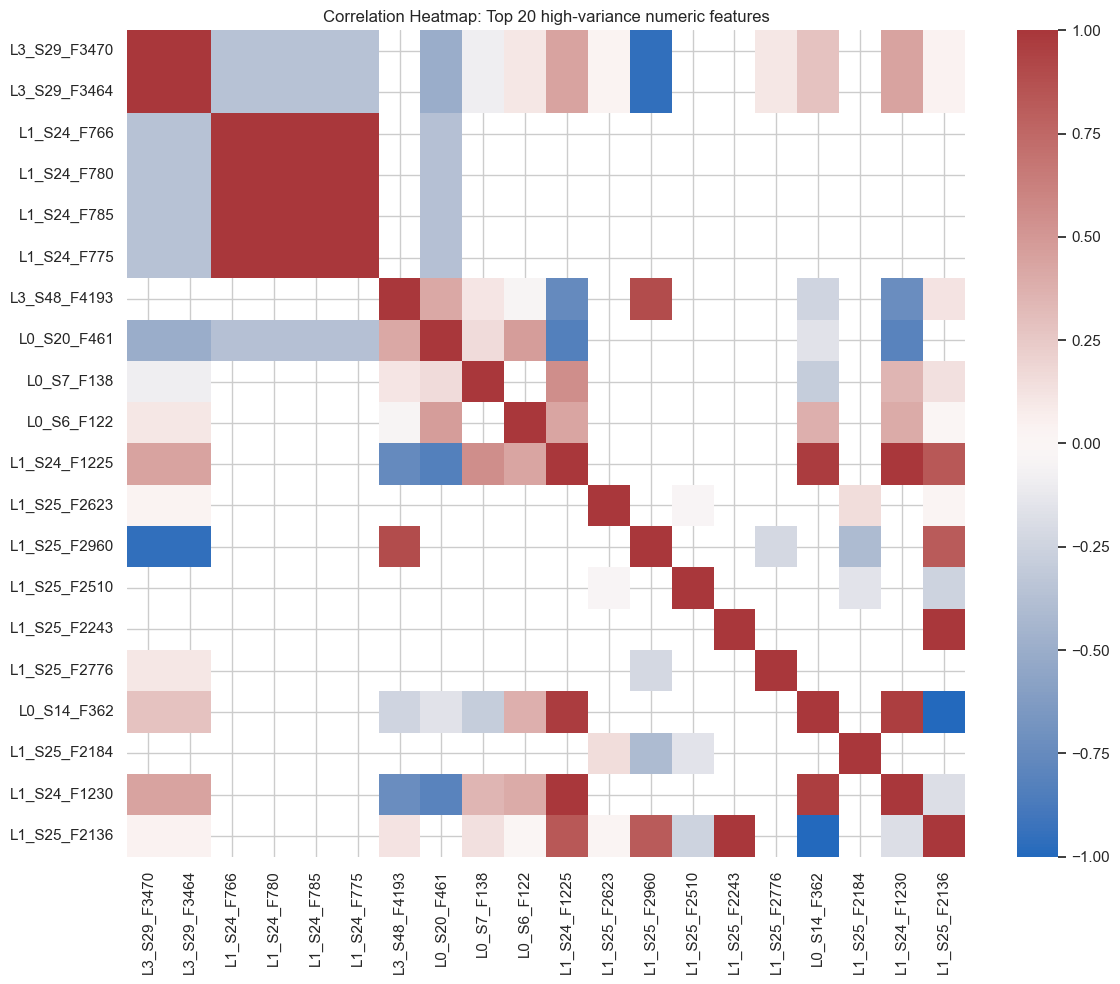

In [42]:
# Bivariate Analysis
# Correlation Matrix (numeric data only)
corr = num_df[num_df.columns.drop('Response', errors='ignore')].corr()

# Heatmap of top 20 high-variance features
topk = 20
top_feats = num_df.var().sort_values(ascending=False).head(topk).index
corr_slice = num_df[top_feats].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_slice, cmap="vlag", center=0)
plt.title(f"Correlation Heatmap: Top {topk} high-variance numeric features")
plt.tight_layout()
plt.show()


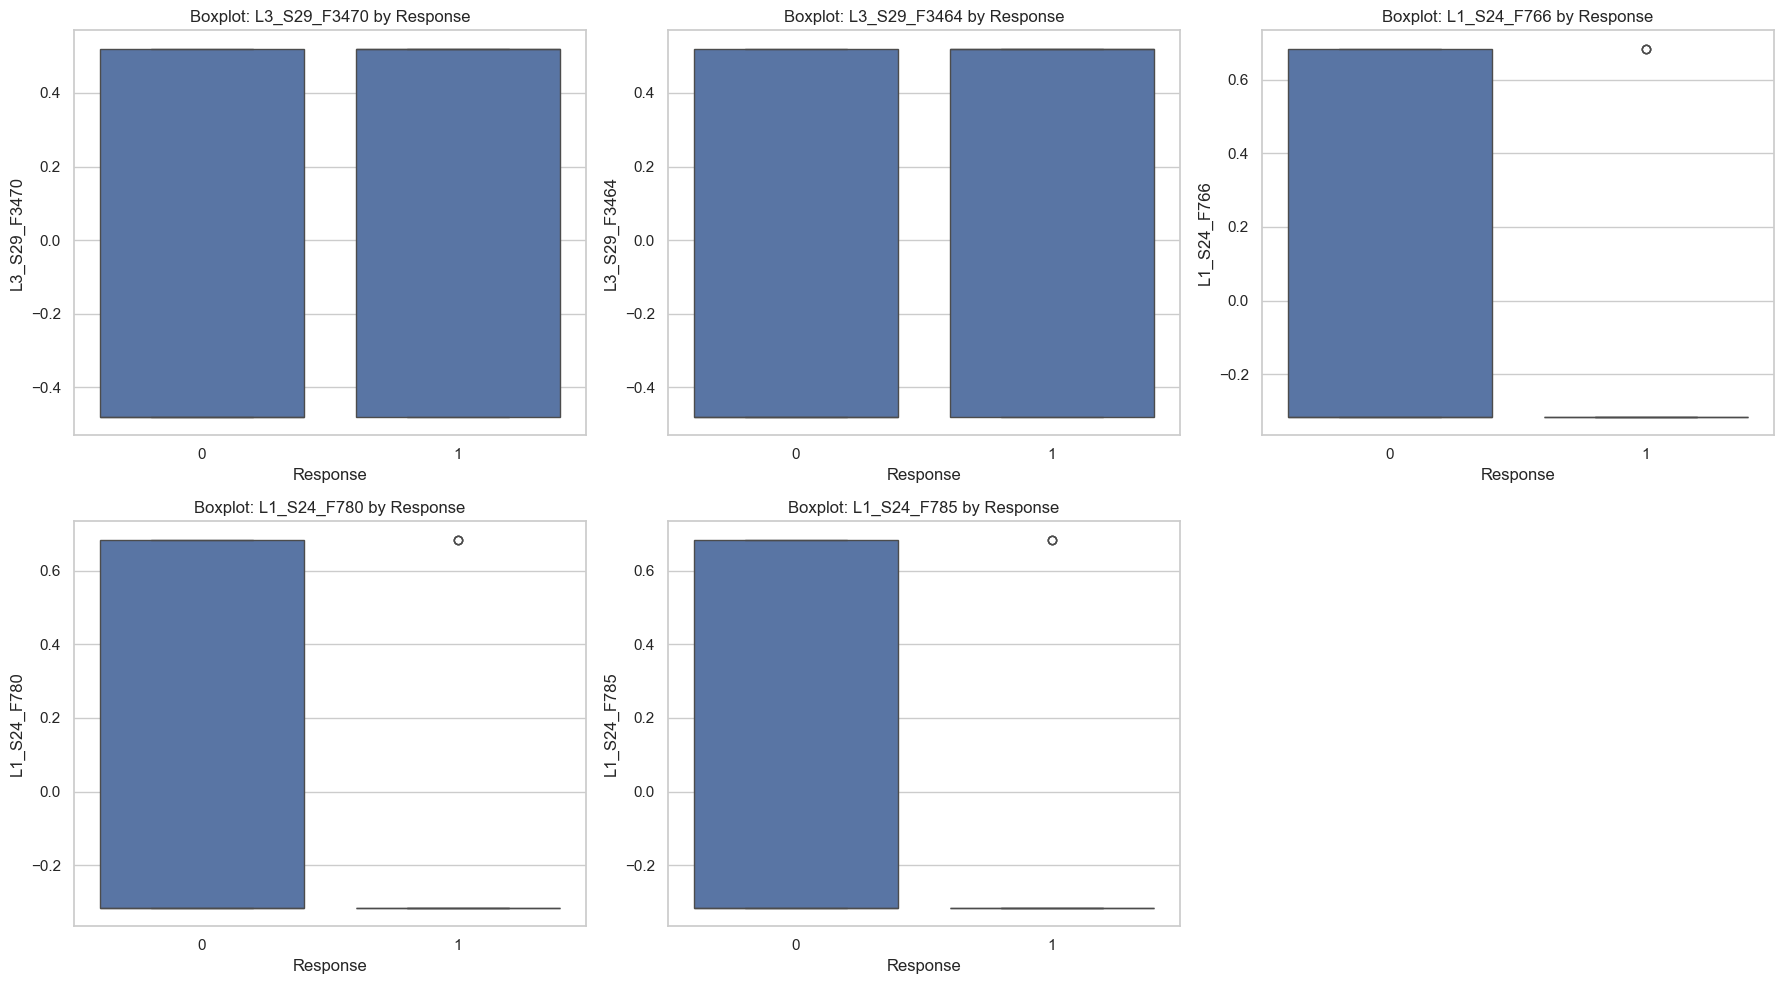

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box Plots - comparing numeric vs categorical.
# Choose a few numeric features with high variance
num_cols = num_df.drop(columns='Response', errors='ignore').var().sort_values(ascending=False).head(5).index

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(data=num_df, x='Response', y=col, ax=axes[i])
    axes[i].set_title(f"Boxplot: {col} by Response")

# Hide any unused subplot (since we only have 5 features)
for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



## Just looking at the 5 boxplot shows trends that some stations and specific features have almost a 50%-50% pass or fail rate. While other features show a much higher failure rate. 

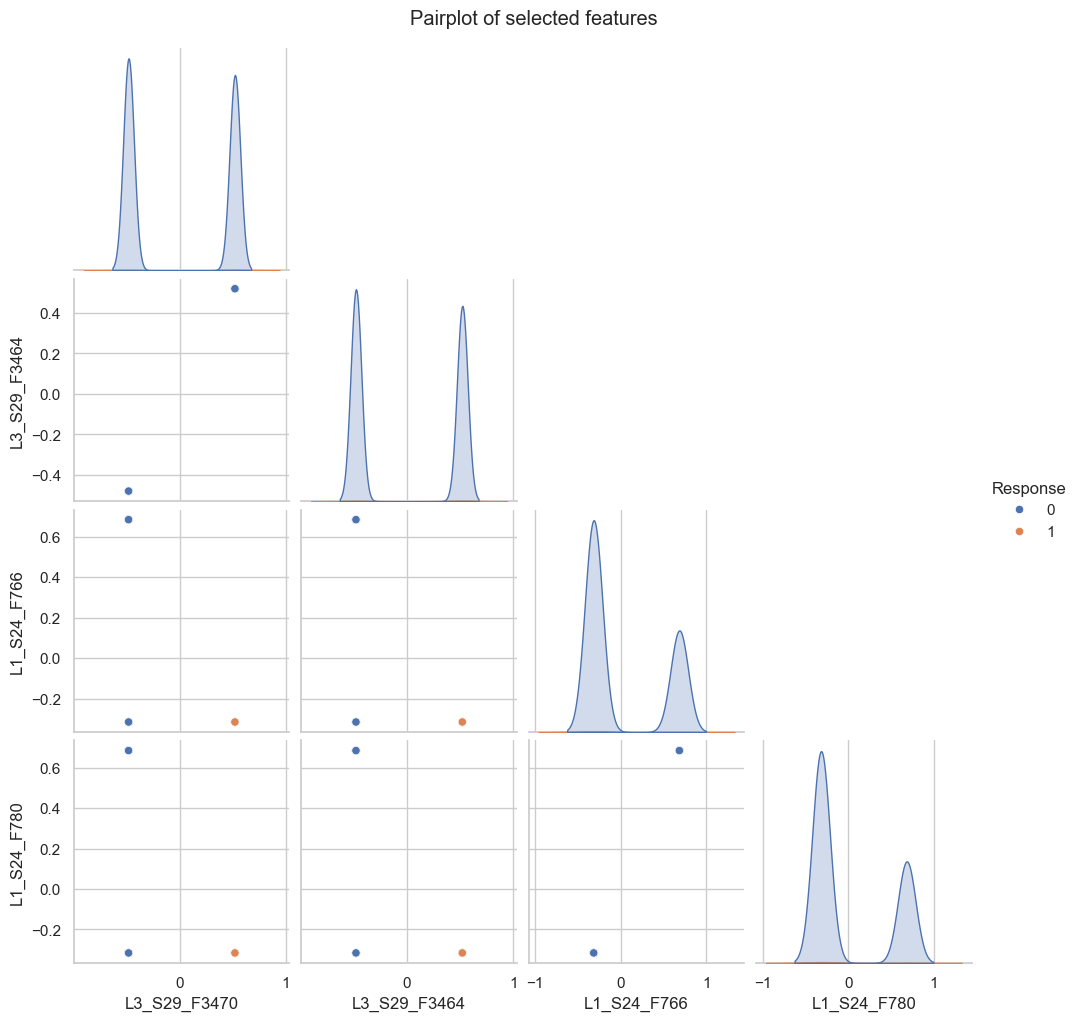

In [45]:
# Multivariate Analysis - 3 plus variable interactions
# Pairplot (scatterplot matrix)
subset_cols = num_cols[:4].tolist() + ['Response']  # 4 numeric + Response
sns.pairplot(num_df[subset_cols], hue='Response', diag_kind="kde", corner=True)
plt.suptitle("Pairplot of selected features", y=1.02)
plt.show()


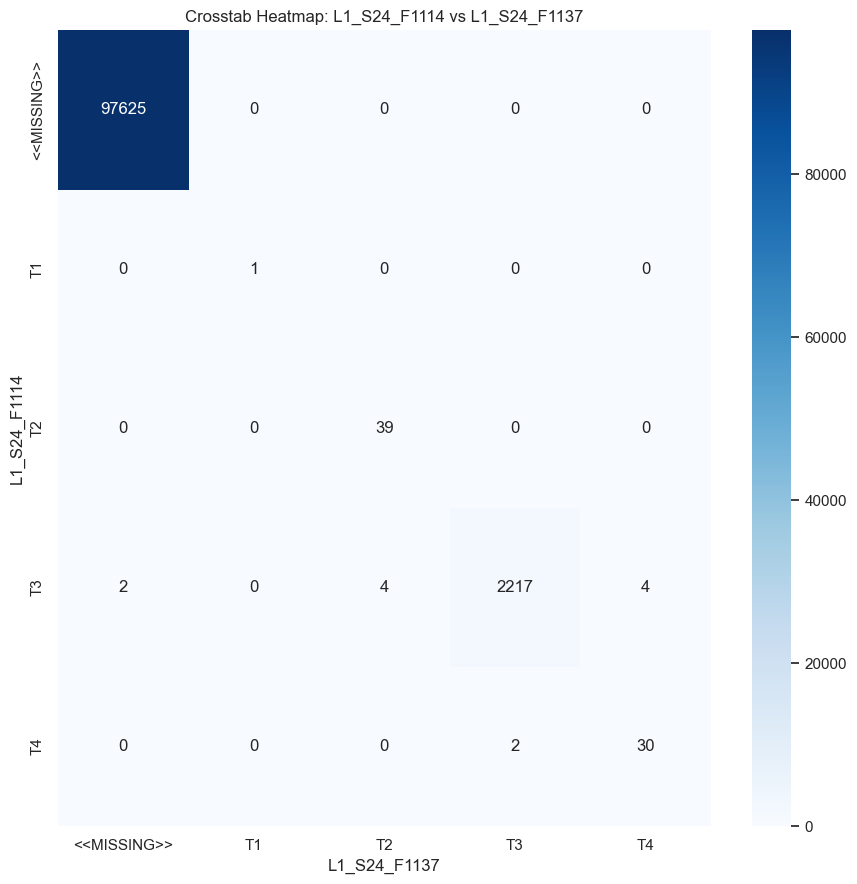

In [46]:
# Heatmap of Feature vs Feature by Target
# Cross-tab of two categorical cols (if any low-cardinality ones exist)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sanitize categorical values
def clean_categorical(s: pd.Series) -> pd.Series:
    s = s.astype("string").fillna("<<MISSING>>")
    s = s.str.replace(r"^T-?\d{5,}$", "<<SENTINEL>>", regex=True)
    s = s.str.slice(0, 60)
    return s

# Choose two safe categorical columns
def pick_two_cats(df_cat: pd.DataFrame,
                  max_card_each: int = 12,
                  min_non_null: int = 2000) -> list:
    candidates = []
    for c in df_cat.columns:
        s = df_cat[c]
        nunq = s.nunique(dropna=True)
        nn = s.notna().sum()
        if 2 <= nunq <= max_card_each and nn >= min_non_null:
            candidates.append(c)
    # Fallback: relax min_non_null if nothing found
    if len(candidates) < 2:
        for c in df_cat.columns:
            s = df_cat[c]
            nunq = s.nunique(dropna=True)
            nn = s.notna().sum()
            if 2 <= nunq <= max_card_each and nn >= 100:  # looser
                candidates.append(c)
                if len(candidates) >= 2:
                    break
    return candidates[:2]

# Build a non-empty crosstab with optional top-K levels
def crosstab_topk(df_cat: pd.DataFrame, col_a: str, col_b: str, topk: int = None) -> pd.DataFrame:
    a = clean_categorical(df_cat[col_a])
    b = clean_categorical(df_cat[col_b])

    if topk is not None:
        a_top = a.value_counts(dropna=False).head(topk).index
        b_top = b.value_counts(dropna=False).head(topk).index
        mask = a.isin(a_top) & b.isin(b_top)
        a = a[mask]; b = b[mask]

    ct = pd.crosstab(a, b, dropna=False)  
    # Remove rows/cols that are entirely zero
    ct = ct.loc[ct.sum(axis=1) > 0, ct.sum(axis=0) > 0]
    return ct

# Plot heatmap
def plot_heatmap_safe(df: pd.DataFrame, title: str, fmt="d", cmap="Blues"):
    if df.size == 0 or df.shape[0] == 0 or df.shape[1] == 0:
        print(f"[skip] Empty crosstab for: {title}")
        return
    plt.figure(figsize=(1.2*len(df.columns)+3, 1.2*len(df.index)+3))
    sns.heatmap(df, annot=True, fmt=fmt, cmap=cmap)
    plt.title(title)
    plt.xlabel(df.columns.name or ""); plt.ylabel(df.index.name or "")
    plt.tight_layout()
    plt.show()

# Use it
# Pick two categorical columns (low-cardinality)
cat_cols = pick_two_cats(cat_df, max_card_each=12, min_non_null=2000)
if len(cat_cols) == 2:
    col_a, col_b = cat_cols
    # basic crosstab
    ct = crosstab_topk(cat_df, col_a, col_b, topk=None)
    plot_heatmap_safe(ct, f"Crosstab Heatmap: {col_a} vs {col_b}")

    # top-K version if cardinality is still big
    if (ct.shape[0] > 20) or (ct.shape[1] > 20):
        ct_top = crosstab_topk(cat_df, col_a, col_b, topk=10)
        plot_heatmap_safe(ct_top, f"Crosstab Heatmap (Top-10): {col_a} vs {col_b}")
else:
    print("[info] Could not find two suitable low-cardinality categorical columns.")



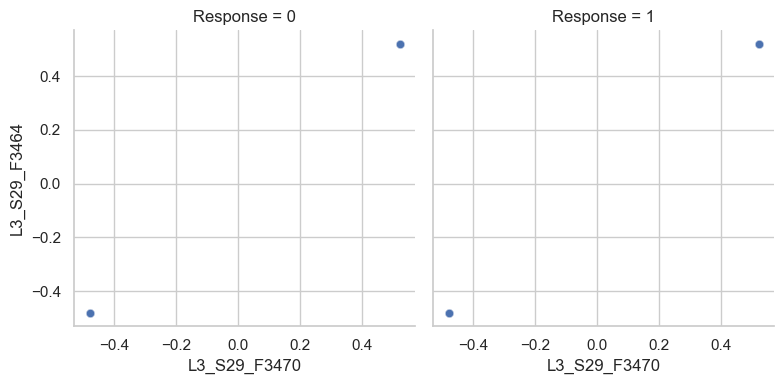

In [47]:
# Multivariate Faceting
# Numeric vs numeric, faceted by Response
if 'Response' in num_df.columns:
    feat_x, feat_y = num_cols[0], num_cols[1]
    g = sns.FacetGrid(num_df, col="Response", height=4)
    g.map_dataframe(sns.scatterplot, x=feat_x, y=feat_y, alpha=0.3)
    g.set_axis_labels(feat_x, feat_y)
    g.set_titles(col_template="Response = {col_name}")
    plt.show()


# Preprocessing
- Categorical to numerical for both the test and train data: One hot encoder
- Numerical data: imputation, standard scaling (since the data sets are separate don't have to worry to do it after the test train split. Can perform the standard scaling on each test and train data set)
- Compare against minimum – maximum scaling
- Unbalanced data - SMOTE (Synthetic Minority Over-sampling Technique) will be investigated later, if needed. 

In [49]:
import numpy as np
import pandas as pd
from scipy import sparse

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

# Grab the sampled dataframes
train_num = sampled_data['train_numerical'].copy()
train_cat = sampled_data['train_categorical'].copy()

test_num  = sampled_data_test['test_numerical'].copy()
test_cat  = sampled_data_test['test_categorical'].copy()

# Set 'Id' as index if present (Bosch has Id as first col)
for df in (train_num, train_cat, test_num, test_cat):
    if 'Id' in df.columns:
        df.set_index('Id', inplace=True)

# Separate target and drop it from numeric features 
assert 'Response' in train_num.columns, "Expected 'Response' in train_numerical"
y_train = train_num['Response'].copy()
train_num = train_num.drop(columns=['Response'])

# Align columns & drop all-NaN columns safely
# Ensure test has all train columns (add missing as NaN)
test_num = test_num.reindex(columns=train_num.columns, fill_value=np.nan)
test_cat = test_cat.reindex(columns=train_cat.columns, fill_value=np.nan)

# Drop numeric columns that are ALL NaN in TRAIN to avoid imputer errors
all_nan_num_cols = train_num.columns[train_num.isna().all()].tolist()
if all_nan_num_cols:
    train_num = train_num.drop(columns=all_nan_num_cols)
    test_num  = test_num.drop(columns=all_nan_num_cols)

# Keep categorical columns (they can be all-NaN; impute a constant)
# But if a column is entirely missing in BOTH train and test, drop it.
all_nan_cat_cols = train_cat.columns[(train_cat.isna().all()) & (test_cat.isna().all())].tolist()
if all_nan_cat_cols:
    train_cat = train_cat.drop(columns=all_nan_cat_cols)
    test_cat  = test_cat.drop(columns=all_nan_cat_cols)

# Feature lists
numeric_features = train_num.columns.tolist()
categorical_features = train_cat.columns.tolist()

# Combine into X dataframes
X_train = pd.concat([train_num, train_cat], axis=1)
X_test  = pd.concat([test_num,  test_cat],  axis=1)




## All-NaN numeric columns are dropped before fitting to avoid SimpleImputer errors.

In [51]:
# Before fitting the pipelines
X_train[numeric_features] = X_train[numeric_features].astype('float32')
X_test[numeric_features]  = X_test[numeric_features].astype('float32')


# Build transformers
# OneHotEncoder: keep sparse to save memory; handle versions with/without sparse_output
try:
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=True, min_frequency=5, max_categories=500)
except TypeError:
    # for older scikit-learn versions
    ohe = OneHotEncoder(handle_unknown='ignore', sparse=True, min_frequency=5, max_categories=500)

cat_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='<<MISSING>>')),
    ('ohe', ohe)
])

num_pipe_standard = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())  # mean/var from TRAIN, then apply to TEST
])

num_pipe_minmax = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())    # min/max from TRAIN, then apply to TEST
])

# ColumnTransformers (two variants to compare)
preproc_standard = ColumnTransformer(
    transformers=[
        ('num', num_pipe_standard, numeric_features),
        ('cat', cat_pipe,          categorical_features)
    ],
    remainder='drop',  # keep only specified columns
    sparse_threshold=1.0,  # favor sparse output if mostly OHE
    n_jobs=1
)

preproc_minmax = ColumnTransformer(
    transformers=[
        ('num', num_pipe_minmax,   numeric_features),
        ('cat', cat_pipe,          categorical_features)
    ],
    remainder='drop',
    sparse_threshold=1.0,
    n_jobs=1
)



## Categorical imputation uses a constant label ("MISSING") so all-missing columns still produce a single OHE column (rather than erroring).
## By setting handle_unknown='ignore' allows the test set have unseen categories without crashing.
## Two preprocessors (Standard vs Min-Max) are trained independently to compare downstream model performance easily.

In [53]:
# Fit on TRAIN, transform TRAIN & TEST
X_train_std = preproc_standard.fit_transform(X_train, y_train)
X_test_std  = preproc_standard.transform(X_test)

X_train_mm  = preproc_minmax.fit_transform(X_train, y_train)
X_test_mm   = preproc_minmax.transform(X_test)

# Utilities: feature names, quick comparison
def get_feature_names(transformer):
    # Works on sklearn >= 1.0
    try:
        return transformer.get_feature_names_out().tolist()
    except Exception:
        # Fallback best-effort for older versions:
        names = []
        # Numeric original names:
        names.extend([f"num__{c}" for c in numeric_features])
        # OHE category names (not exact without access to ohe categories_)
        names.extend([f"cat__{c}__<levels>" for c in categorical_features])
        return names

std_feat_names = get_feature_names(preproc_standard)
mm_feat_names  = get_feature_names(preproc_minmax)

def describe_matrix(name, mat):
    shape = (mat.shape[0], mat.shape[1])
    is_sparse = sparse.issparse(mat)
    density = None
    if is_sparse:
        density = mat.nnz / (mat.shape[0] * mat.shape[1])
    print(f"{name}: shape={shape}, sparse={is_sparse}, density={density if density is not None else 'n/a'}")

print("\n=== Transformed matrices ===")
describe_matrix("X_train_std", X_train_std)
describe_matrix("X_test_std ", X_test_std)
describe_matrix("X_train_mm ", X_train_mm)
describe_matrix("X_test_mm  ", X_test_mm)




=== Transformed matrices ===
X_train_std: shape=(99924, 4334), sparse=True, density=0.6063739544961416
X_test_std : shape=(30001, 4334), sparse=True, density=0.6063713581490062
X_train_mm : shape=(99924, 4334), sparse=True, density=0.600477105562849
X_test_mm  : shape=(30001, 4334), sparse=True, density=0.6004690937313318


## Fit on train, apply to test: both imputers, scalers, and the OHE learn from train only, preventing leakage.

## Feature selection/engineering
- Principal component analysis (PCA)

TruncatedSVD: tried 300 comps; 300 comps reach ~0.755 cumulative variance.


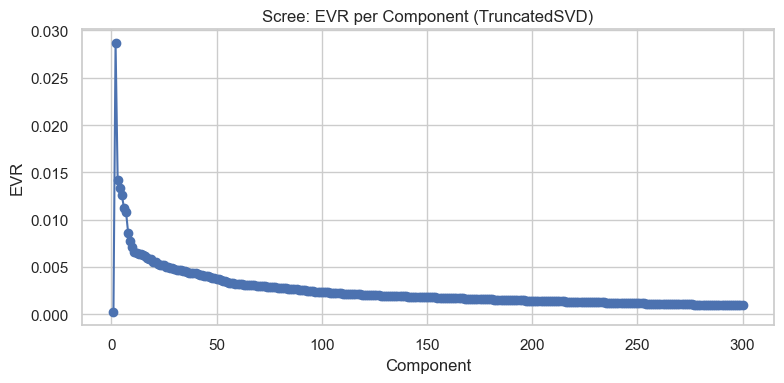

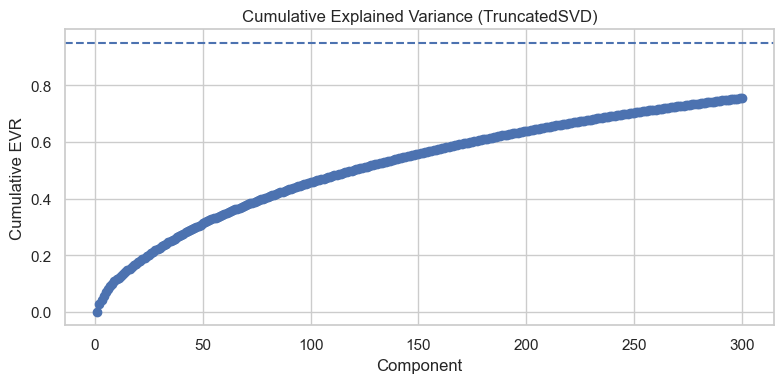

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, TruncatedSVD
from scipy import sparse

# choose component cap
n_features = X_train_std.shape[1]
n_components_try = max(2, min(300, n_features - 1))
evr_target = 0.95

if sparse.issparse(X_train_std):
    # SVD path (sparse)
    svd = TruncatedSVD(n_components=n_components_try, random_state=42)
    X_train_pcs = svd.fit_transform(X_train_std)
    X_test_pcs  = svd.transform(X_test_std)
    evr = svd.explained_variance_ratio_
    cum_evr = np.cumsum(evr)
    k = int(np.searchsorted(cum_evr, evr_target) + 1)
    k = max(2, min(k, n_components_try))
    model_used = "TruncatedSVD"
else:
    # PCA path (dense)
    # randomized solver is fast for many features/samples
    pca = PCA(n_components=n_components_try, svd_solver='randomized', random_state=42)
    X_train_pcs = pca.fit_transform(X_train_std)
    X_test_pcs  = pca.transform(X_test_std)
    evr = pca.explained_variance_ratio_
    cum_evr = np.cumsum(evr)
    k = int(np.searchsorted(cum_evr, evr_target) + 1)
    k = max(2, min(k, n_components_try))
    model_used = "PCA (randomized)"

print(f"{model_used}: tried {n_components_try} comps; "
      f"{k} comps reach ~{cum_evr[k-1]:.3f} cumulative variance.")

# keep first k
X_train_pca_std = X_train_pcs[:, :k]
X_test_pca_std  = X_test_pcs[:, :k]

pc_cols = [f"PC{i}" for i in range(1, k+1)]
train_ids = (sampled_data['train_numerical'].set_index('Id').index
             if 'Id' in sampled_data['train_numerical'].columns else None)
test_ids  = (sampled_data_test['test_numerical'].set_index('Id').index
             if 'Id' in sampled_data_test['test_numerical'].columns else None)

train_pca_std_df = pd.DataFrame(X_train_pca_std, index=train_ids, columns=pc_cols)
test_pca_std_df  = pd.DataFrame(X_test_pca_std,  index=test_ids,  columns=pc_cols)

# scree plots
plt.figure(figsize=(8,4))
plt.plot(np.arange(1, len(evr)+1), evr, marker='o')
plt.title(f"Scree: EVR per Component ({model_used})")
plt.xlabel("Component"); plt.ylabel("EVR")
plt.tight_layout(); plt.show()

plt.figure(figsize=(8,4))
plt.plot(np.arange(1, len(cum_evr)+1), cum_evr, marker='o')
plt.axhline(evr_target, ls='--')
plt.title(f"Cumulative Explained Variance ({model_used})")
plt.xlabel("Component"); plt.ylabel("Cumulative EVR")
plt.tight_layout(); plt.show()



## Modeling
- Logistic regression model - L1 regularization
- Decision tree model (Tree depth (n=5))
- Hyper parameter tuning for both logistic regression and decision tree

In [58]:
import os
# Limit BLAS threads to avoid oversubscription (helps RAM/CPU thrash)
# Got this hint from the internet
os.environ.setdefault("OMP_NUM_THREADS", "1")
os.environ.setdefault("MKL_NUM_THREADS", "1")


from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from scipy import sparse

# Reload sampled data
train_num = sampled_data['train_numerical'].copy()
train_cat = sampled_data['train_categorical'].copy()
test_num  = sampled_data_test['test_numerical'].copy()
test_cat  = sampled_data_test['test_categorical'].copy()

for df in (train_num, train_cat, test_num, test_cat):
    if 'Id' in df.columns:
        df.set_index('Id', inplace=True)

assert 'Response' in train_num.columns, "Expected 'Response' in train_numerical"
y = train_num['Response'].astype(int)
train_num = train_num.drop(columns=['Response'])

# Align test columns to train columns
test_num = test_num.reindex(columns=train_num.columns, fill_value=np.nan)
test_cat = test_cat.reindex(columns=train_cat.columns, fill_value=np.nan)

numeric_features = train_num.columns.tolist()
categorical_features = train_cat.columns.tolist()

X_train_raw = pd.concat([train_num, train_cat], axis=1)
X_test_raw  = pd.concat([test_num,  test_cat],  axis=1)

# OHE factory that reduces cardinality + returns sparse
def make_ohe_slim():
    try:
        # Newer sklearn: group rare levels automatically
        return OneHotEncoder(
            handle_unknown='infrequent_if_exist',
            min_frequency=10,            
            sparse_output=True
        )
    except TypeError:
        try:
            return OneHotEncoder(
                handle_unknown='ignore',
                max_categories=50,
                sparse=True
            )
        except TypeError:
            return OneHotEncoder(
                handle_unknown='ignore',
                sparse=True
            )

ohe_linear = make_ohe_slim()
ohe_tree   = make_ohe_slim()

# Preprocessors
preproc_linear = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler',  StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='<<MISSING>>')),
            ('ohe',     ohe_linear)
        ]), categorical_features),
    ],
    remainder='drop',
    sparse_threshold=1.0   # always prefer sparse if any block is sparse
)

preproc_tree = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
        ]), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='<<MISSING>>')),
            ('ohe',     ohe_tree)
        ]), categorical_features),
    ],
    remainder='drop',
    sparse_threshold=1.0
)





## I performed dimensionality reduced before the classifier (often best for OHE-heavy data) and reran the program and its still running after 12 hours without completing the kernal. I determined that the bottlenecks are: (1) refitting OHE+SVD inside every CV fold, (2) too many candidates/folds, and (3) using a heavy solver on high-dim data.
## To make it run faster, I did the following: 
- Tune on a stratified subset (30k rows), then refit best params on the full 100k.
- Use HalvingRandomSearchCV (successive halving) with 3-fold CV.
- Shrink SVD to ~50 comps and n_iter=2.
- Use L1 + liblinear (binary) after SVD (way faster than saga here).
- For the tree, compress the categorical branch with OHE → SVD inside the ColumnTransformer (dramatically fewer features).

In [60]:
import numpy as np
import pandas as pd
from scipy import sparse
from scipy.stats import loguniform

from sklearn.experimental import enable_halving_search_cv  
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit, HalvingRandomSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Pull sampled data 
train_num = sampled_data['train_numerical'].copy()
train_cat = sampled_data['train_categorical'].copy()
test_num  = sampled_data_test['test_numerical'].copy()
test_cat  = sampled_data_test['test_categorical'].copy()

for df in (train_num, train_cat, test_num, test_cat):
    if 'Id' in df.columns:
        df.set_index('Id', inplace=True)

y = train_num['Response'].astype(int)
train_num = train_num.drop(columns=['Response'])

# Align test to train columns
test_num = test_num.reindex(columns=train_num.columns, fill_value=np.nan)
test_cat = test_cat.reindex(columns=train_cat.columns, fill_value=np.nan)

numeric_features = train_num.columns.tolist()
categorical_features = train_cat.columns.tolist()

X_train_raw = pd.concat([train_num, train_cat], axis=1)
X_test_raw  = pd.concat([test_num,  test_cat],  axis=1)

# Slimmer OHE to cut width
def make_ohe_slim():
    try:
        # Newer sklearn: group rare levels
        return OneHotEncoder(handle_unknown='infrequent_if_exist', min_frequency=10, sparse_output=True)
    except TypeError:
        try:
            return OneHotEncoder(handle_unknown='ignore', max_categories=50, sparse=True)
        except TypeError:
            return OneHotEncoder(handle_unknown='ignore', sparse=True)

# Pipelines (FAST)
# (a) Logistic (L1) path: numeric (impute+scale) + categorical (OHE) to SVD(50) to L1 liblinear
preproc_linear = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler',  StandardScaler()),
        ]), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='<<MISSING>>')),
            ('ohe',     make_ohe_slim()),
        ]), categorical_features),
    ],
    remainder='drop',
    sparse_threshold=1.0
)

logit_pipe_fast = Pipeline([
    ('prep', preproc_linear),
    ('svd',  TruncatedSVD(n_components=50, n_iter=2, random_state=42)),
    ('clf',  LogisticRegression(
        penalty='l1', solver='liblinear',
        max_iter=2000, tol=1e-3, random_state=42
    ))
])

# (b) Decision Tree path: numeric (impute) + categorical (OHE to SVD(50)) ; concat to DT
preproc_tree_fast = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
        ]), numeric_features),
        ('cat_svd', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='<<MISSING>>')),
            ('ohe',     make_ohe_slim()),
            ('svd',     TruncatedSVD(n_components=50, n_iter=2, random_state=42))
        ]), categorical_features),
    ],
    remainder='drop',
    sparse_threshold=1.0
)

tree_pipe_fast = Pipeline([
    ('prep', preproc_tree_fast),
    ('clf',  DecisionTreeClassifier(max_depth=5, random_state=42))
])

# Make a 30k stratified tuning subset
sss = StratifiedShuffleSplit(n_splits=1, train_size=min(30000, len(X_train_raw)), random_state=42)
tune_idx, _ = next(sss.split(X_train_raw, y))
X_tune = X_train_raw.iloc[tune_idx]
y_tune = y.iloc[tune_idx]

# HalvingRandomSearchCV (3-fold, small search)
cv3 = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
scorer = 'roc_auc'

logit_search = HalvingRandomSearchCV(
    estimator=logit_pipe_fast,
    param_distributions={
        'clf__C': loguniform(1e-3, 1e0),             # 0.001..1
        'clf__class_weight': [None, 'balanced'],
        'svd__n_components': [30, 50, 80],
    },
    factor=2,              
    min_resources=8000,    # start with 8k samples then ramp up
    resource='n_samples',
    cv=cv3,
    n_jobs=1,              # safest for RAM
    verbose=1,
    random_state=42,
    refit=True
)

tree_search = HalvingRandomSearchCV(
    estimator=tree_pipe_fast,
    param_distributions={
        'clf__max_depth': [3, 5, 7, 9],
        'clf__min_samples_split': [2, 20, 100],
        'clf__min_samples_leaf': [1, 10, 50],
        'clf__class_weight': [None, 'balanced'],
        # Try a couple SVD sizes for the cat branch:
        'prep__cat_svd__svd__n_components': [30, 50, 80],
    },
    factor=2,
    min_resources=8000,
    resource='n_samples',
    cv=cv3,
    n_jobs=1,
    verbose=1,
    random_state=42,
    refit=True
)

print("=== Halving search (Logistic L1 + SVD) on 30k subset ===")
logit_search.fit(X_tune, y_tune)
print("Best AUC (tune):", logit_search.best_score_)
print("Best params:", logit_search.best_params_)

print("\n=== Halving search (Decision Tree + cat SVD) on 30k subset ===")
tree_search.fit(X_tune, y_tune)
print("Best AUC (tune):", tree_search.best_score_)
print("Best params:", tree_search.best_params_)

# ---------- 5) Refit best pipelines on FULL train, then predict TEST ----------
best_logit = logit_search.best_estimator_
best_tree  = tree_search.best_estimator_

best_logit.fit(X_train_raw, y)
best_tree.fit(X_train_raw, y)

test_proba_logit = best_logit.predict_proba(X_test_raw)[:, 1]
test_proba_tree  = best_tree.predict_proba(X_test_raw)[:, 1]

test_ids = X_test_raw.index
preds_df = pd.DataFrame({
    'Id': test_ids,
    'proba_logit_l1': test_proba_logit,
    'proba_tree':     test_proba_tree
})
preds_df.head()




=== Halving search (Logistic L1 + SVD) on 30k subset ===
n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 8000
max_resources_: 30000
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 3
n_resources: 8000
Fitting 3 folds for each of 3 candidates, totalling 9 fits
----------
iter: 1
n_candidates: 2
n_resources: 16000
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best AUC (tune): 0.9943746484155259
Best params: {'clf__C': 0.013292918943162165, 'clf__class_weight': None, 'svd__n_components': 80}

=== Halving search (Decision Tree + cat SVD) on 30k subset ===
n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 8000
max_resources_: 30000
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 3
n_resources: 8000
Fitting 3 folds for each of 3 candidates, totalling 9 fits
----------
iter: 1
n_candidates: 2
n_resources: 16000
Fitting 3 folds for each of 2 candidates, totalling 6 fi

,Id,proba_logit_l1,proba_tree
0,5,0.004729,0.824561
1,144,0.009324,0.148621
2,222,0.006959,0.437012
3,231,0.005206,0.000000
4,267,0.004964,0.000000


## Evaluation
- F1 Score
- Precision
- RMSE
- Matthews Correlation Coefficient (MCC) between the predicted and the observed (will be done for the final project)

In [61]:
import numpy as np
import pandas as pd

from sklearn.base import clone
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    mean_squared_error, confusion_matrix, classification_report
)

# Make a stratified hold-out split (20% for validation)
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, val_idx = next(sss.split(X_train_raw, y))

X_tr, X_val = X_train_raw.iloc[train_idx], X_train_raw.iloc[val_idx]
y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

# Evaluate a pipeline on the hold-out
def evaluate_pipeline(pipeline, name: str, threshold: float = 0.5):
    # clone to avoid mutating tuned objects
    model = clone(pipeline)
    model.fit(X_tr, y_tr)

    # hard preds at given threshold (use predict_proba for consistent thresholding)
    y_proba = model.predict_proba(X_val)[:, 1]
    y_pred  = (y_proba >= threshold).astype(int)

    # metrics
    precision = precision_score(y_val, y_pred, zero_division=0)
    recall    = recall_score(y_val, y_pred, zero_division=0)
    f1        = f1_score(y_val, y_pred, zero_division=0)

    # RMSE probabilities and label computed:
    rmse_prob  = np.sqrt(mean_squared_error(y_val, y_proba))   # on probabilities
    rmse_label = np.sqrt(mean_squared_error(y_val, y_pred))    # on 0/1 predictions

    cm = confusion_matrix(y_val, y_pred)

    print(f"\n=== {name} @ threshold={threshold:.2f} ===")
    print(f"Precision: {precision:.4f} | Recall: {recall:.4f} | F1: {f1:.4f}")
    print(f"RMSE (prob):  {rmse_prob:.4f}")
    print(f"RMSE (label): {rmse_label:.4f}")
    print("Confusion matrix [TN FP; FN TP]:\n", cm)

    return {
        "Model": name,
        "Threshold": threshold,
        "Precision": precision,
        "Recall": recall,
        "F1": f1,
        "RMSE_prob": rmse_prob,
        "RMSE_label": rmse_label
    }

# Choose a threshold that maximizes F1 on the val set
def best_f1_threshold(pipeline, grid=np.linspace(0.1, 0.9, 17)):
    model = clone(pipeline).fit(X_tr, y_tr)
    y_proba = model.predict_proba(X_val)[:, 1]
    best_th, best_f1 = 0.5, -1.0
    for th in grid:
        f1 = f1_score(y_val, (y_proba >= th).astype(int), zero_division=0)
        if f1 > best_f1:
            best_f1, best_th = f1, th
    return best_th, best_f1

# Find per-model best thresholds (fast) and evaluate at both 0.5 and best-F1
results = []

# Logistic (L1)
th_logit, f1_logit = best_f1_threshold(best_logit)
results.append(evaluate_pipeline(best_logit, "Logistic L1", threshold=0.5))
results.append(evaluate_pipeline(best_logit, "Logistic L1 (best-F1 th)", threshold=th_logit))

# Decision Tree
th_tree, f1_tree = best_f1_threshold(best_tree)
results.append(evaluate_pipeline(best_tree, "Decision Tree (depth≈5)", threshold=0.5))
results.append(evaluate_pipeline(best_tree, "Decision Tree (best-F1 th)", threshold=th_tree))

# Compact comparison table
eval_df = pd.DataFrame(results)
eval_df = eval_df[["Model", "Threshold", "Precision", "F1", "RMSE_prob", "RMSE_label"]]
eval_df.sort_values(by=["F1", "Precision"], ascending=False, inplace=True)
eval_df.reset_index(drop=True, inplace=True)
eval_df



=== Logistic L1 @ threshold=0.50 ===
Precision: 0.0000 | Recall: 0.0000 | F1: 0.0000
RMSE (prob):  0.0750
RMSE (label): 0.0752
Confusion matrix [TN FP; FN TP]:
 [[19872     0]
 [  113     0]]

=== Logistic L1 (best-F1 th) @ threshold=0.10 ===
Precision: 0.0000 | Recall: 0.0000 | F1: 0.0000
RMSE (prob):  0.0750
RMSE (label): 0.0755
Confusion matrix [TN FP; FN TP]:
 [[19871     1]
 [  113     0]]

=== Decision Tree (depth≈5) @ threshold=0.50 ===
Precision: 0.0073 | Recall: 0.3540 | F1: 0.0144
RMSE (prob):  0.3914
RMSE (label): 0.5241
Confusion matrix [TN FP; FN TP]:
 [[14456  5416]
 [   73    40]]

=== Decision Tree (best-F1 th) @ threshold=0.90 ===
Precision: 0.0711 | Recall: 0.1239 | F1: 0.0903
RMSE (prob):  0.3914
RMSE (label): 0.1188
Confusion matrix [TN FP; FN TP]:
 [[19689   183]
 [   99    14]]


,Model,Threshold,Precision,F1,RMSE_prob,RMSE_label
0,Decision Tree (best-F1 th),0.9,0.071066,0.090323,0.391419,0.118788
1,Decision Tree (depth≈5),0.5,0.007331,0.014365,0.391419,0.524076
2,Logistic L1,0.5,0.000000,0.000000,0.074968,0.075195
3,Logistic L1 (best-F1 th),0.1,0.000000,0.000000,0.074968,0.075527


## Based on the Module 20 lesson on Voting Classifier, I am tyring to determine if adding a Voting Classifier will help improve the F1 and precision scores. I investigated both Hard and Soft voting. 

In [65]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
import numpy as np

# X_tr, X_val, y_tr, y_val  (from StratifiedShuffleSplit)
# best_logit, best_tree     (HalvingRandomSearchCV best_estimator_ pipelines)

# Option A: HARD voting (majority on class labels)
hard_voter = VotingClassifier(
    estimators=[('logit', best_logit), ('tree', best_tree)],
    voting='hard',
    n_jobs=1
)
hard_voter.fit(X_tr, y_tr)
y_pred_hard = hard_voter.predict(X_val)

print("\n=== VotingClassifier (HARD) — Logistic L1 + Decision Tree ===")
print(f"Precision: {precision_score(y_val, y_pred_hard, zero_division=0):.4f} | "
      f"Recall: {recall_score(y_val, y_pred_hard, zero_division=0):.4f} | "
      f"F1: {f1_score(y_val, y_pred_hard, zero_division=0):.4f}")
print("Confusion matrix [TN FP; FN TP]:\n", confusion_matrix(y_val, y_pred_hard))
print("\nClassification Report:\n", classification_report(y_val, y_pred_hard, zero_division=0))

# Option B: SOFT voting (average predicted probabilities).
# Both DecisionTreeClassifier and LogisticRegression support predict_proba
soft_voter = VotingClassifier(
    estimators=[('logit', best_logit), ('tree', best_tree)],
    voting='soft',
    weights=[1, 3], #Since tree produced better results, tree counts 3x as much as logistic reg
    n_jobs=1
)
soft_voter.fit(X_tr, y_tr)

# Fixed 0.5 threshold:
y_proba_soft = soft_voter.predict_proba(X_val)[:, 1]
y_pred_soft_05 = (y_proba_soft >= 0.5).astype(int)

print("\n=== VotingClassifier (SOFT, th=0.50) — Logistic L1 + Decision Tree ===")
print(f"Precision: {precision_score(y_val, y_pred_soft_05, zero_division=0):.4f} | "
      f"Recall: {recall_score(y_val, y_pred_soft_05, zero_division=0):.4f} | "
      f"F1: {f1_score(y_val, y_pred_soft_05, zero_division=0):.4f}")
print("Confusion matrix [TN FP; FN TP]:\n", confusion_matrix(y_val, y_pred_soft_05))
print("\nClassification Report:\n", classification_report(y_val, y_pred_soft_05, zero_division=0))

# Optional: choose the best F1 threshold on the validation set
def best_f1_threshold_for(ensemble, X_val, y_val, grid=np.linspace(0.05, 0.95, 19)):
    proba = ensemble.predict_proba(X_val)[:, 1]
    best_th, best_f1 = 0.5, -1.0
    for th in grid:
        f1 = f1_score(y_val, (proba >= th).astype(int), zero_division=0)
        if f1 > best_f1:
            best_th, best_f1 = th, f1
    return best_th, best_f1

best_th, best_f1 = best_f1_threshold_for(soft_voter, X_val, y_val)
y_pred_soft_best = (soft_voter.predict_proba(X_val)[:, 1] >= best_th).astype(int)

print(f"\nBest-F1 threshold for SOFT voter: {best_th:.2f} | F1: {best_f1:.4f}")
print("Confusion matrix [TN FP; FN TP]:\n", confusion_matrix(y_val, y_pred_soft_best))



=== VotingClassifier (HARD) — Logistic L1 + Decision Tree ===
Precision: 0.0000 | Recall: 0.0000 | F1: 0.0000
Confusion matrix [TN FP; FN TP]:
 [[19872     0]
 [  113     0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     19872
           1       0.00      0.00      0.00       113

    accuracy                           0.99     19985
   macro avg       0.50      0.50      0.50     19985
weighted avg       0.99      0.99      0.99     19985


=== VotingClassifier (SOFT, th=0.50) — Logistic L1 + Decision Tree ===
Precision: 0.0116 | Recall: 0.1858 | F1: 0.0219
Confusion matrix [TN FP; FN TP]:
 [[18087  1785]
 [   92    21]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.91      0.95     19872
           1       0.01      0.19      0.02       113

    accuracy                           0.91     19985
   macro avg       0.50      0.55      0.49 

## Results from VotingClassifier with balanced weights: 
## === VotingClassifier (HARD) — Logistic L1 + Decision Tree ===
Precision: 0.0000 | Recall: 0.0000 | F1: 0.0000
Confusion matrix [TN FP; FN TP]:
 [[19870     0]
 [  112     0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     19870
           1       0.00      0.00      0.00       112

    accuracy                           0.99     19982
   macro avg       0.50      0.50      0.50     19982
weighted avg       0.99      0.99      0.99     19982


=== VotingClassifier (SOFT, th=0.50) — Logistic L1 + Decision Tree ===
Precision: 0.5000 | Recall: 0.0089 | F1: 0.0175
Confusion matrix [TN FP; FN TP]:
 [[19869     1]
 [  111     1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     19870
           1       0.50      0.01      0.02       112

    accuracy                           0.99     19982
   macro avg       0.75      0.50      0.51     19982
weighted avg       0.99      0.99      0.99     19982


Best-F1 threshold for SOFT voter: 0.45 | F1: 0.1232
Confusion matrix [TN FP; FN TP]:
 [[19723   147]
 [   95    17]]

## I re-ran the above Voting Classifier code with weight ratio of 3:1 for Decision_Tree:Logistic Regression. This is because, in the original model, Decision Tree performed better than Logistic Regression. 

## Now, I will use XGBoost to see if the performance is better. It uses a preprocessing path for trees (no scaling), compresses high-cardinality OHE with SVD, tunes a small hyperparam space with HalvingRandomSearchCV, and then evaluates with both 0.5 and best-F1 thresholds.

In [62]:
pip install xgboost

In [63]:
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Class imbalance weight (helps XGBoost)
pos = int(y.sum())
neg = int(len(y) - pos)
scale_pos_weight = (neg / max(pos, 1))
print(f"scale_pos_weight ~ {scale_pos_weight:.1f}  (neg={neg}, pos={pos})")

# Preprocessor for XGB (tree-friendly): median impute for num; OHE to SVD for categorical
def make_ohe_slim():
    try:
        return OneHotEncoder(handle_unknown='infrequent_if_exist', min_frequency=10, sparse_output=True)
    except TypeError:
        try:
            return OneHotEncoder(handle_unknown='ignore', max_categories=50, sparse=True)
        except TypeError:
            return OneHotEncoder(handle_unknown='ignore', sparse=True)

preproc_xgb = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numeric_features),
        ('cat_svd', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='<<MISSING>>')),
            ('ohe',     make_ohe_slim()),
            ('svd',     TruncatedSVD(n_components=100, n_iter=2, random_state=42))
        ]), categorical_features),
    ],
    remainder='drop',
    sparse_threshold=1.0
)

# XGB pipeline 
xgb_base = XGBClassifier(
    objective='binary:logistic',
    tree_method='hist',
    eval_metric='auc',
    n_estimators=400,          # will be tuned
    learning_rate=0.1,         # will be tuned
    max_depth=6,               # will be tuned
    subsample=0.9,
    colsample_bytree=0.9,
    reg_lambda=1.0,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    n_jobs=1                   
)

xgb_pipe = Pipeline([
    ('prep', preproc_xgb),
    ('clf',  xgb_base),
])

# Light-weight hyperparam search on the 30k tune subset
cv3 = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

param_dist = {
    'clf__n_estimators': [300, 500, 800],
    'clf__learning_rate': [0.05, 0.1, 0.2],
    'clf__max_depth': [4, 6, 8],
    'clf__subsample': [0.7, 0.85, 1.0],
    'clf__colsample_bytree': [0.7, 0.9, 1.0],
    'clf__reg_lambda': [0.5, 1.0, 2.0],
}

print("\n=== Halving search (XGB) on 30k subset ===")
xgb_search = HalvingRandomSearchCV(
    estimator=xgb_pipe,
    param_distributions=param_dist,
    factor=2,
    min_resources=8000,        
    resource='n_samples',
    cv=cv3,
    scoring='roc_auc',
    n_jobs=1,
    random_state=42,
    verbose=1,
    refit=True
)

xgb_search.fit(X_tune, y_tune)
print("Best AUC (tune):", xgb_search.best_score_)
print("Best params:", xgb_search.best_params_)

best_xgb = xgb_search.best_estimator_

# Evaluate the X_val, y_val
# Fixed 0.5 threshold
y_proba = best_xgb.predict_proba(X_val)[:, 1]
y_pred_05 = (y_proba >= 0.5).astype(int)

auc  = roc_auc_score(y_val, y_proba)
prec = precision_score(y_val, y_pred_05, zero_division=0)
rec  = recall_score(y_val, y_pred_05, zero_division=0)
f1   = f1_score(y_val, y_pred_05, zero_division=0)

print("\n=== XGBoost @ threshold=0.50 ===")
print(f"AUC: {auc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | F1: {f1:.4f}")
print("Confusion matrix [TN FP; FN TP]:\n", confusion_matrix(y_val, y_pred_05))

# Best-F1 threshold (often better on imbalanced data)
ths = np.linspace(0.05, 0.95, 19)
best_th, best_f1 = 0.5, -1.0
for t in ths:
    f1t = f1_score(y_val, (y_proba >= t).astype(int), zero_division=0)
    if f1t > best_f1:
        best_f1, best_th = f1t, t

y_pred_best = (y_proba >= best_th).astype(int)
prec_b = precision_score(y_val, y_pred_best, zero_division=0)
rec_b  = recall_score(y_val, y_pred_best, zero_division=0)

print(f"\n=== XGBoost @ best-F1 threshold={best_th:.2f} ===")
print(f"AUC: {auc:.4f} | Precision: {prec_b:.4f} | Recall: {rec_b:.4f} | F1: {best_f1:.4f}")
print("Confusion matrix [TN FP; FN TP]:\n", confusion_matrix(y_val, y_pred_best))

scale_pos_weight ~ 176.5  (neg=99361, pos=563)

=== Halving search (XGB) on 30k subset ===
n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 8000
max_resources_: 30000
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 3
n_resources: 8000
Fitting 3 folds for each of 3 candidates, totalling 9 fits
----------
iter: 1
n_candidates: 2
n_resources: 16000
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best AUC (tune): 0.6460578197662459
Best params: {'clf__subsample': 0.7, 'clf__reg_lambda': 1.0, 'clf__n_estimators': 300, 'clf__max_depth': 6, 'clf__learning_rate': 0.2, 'clf__colsample_bytree': 0.9}

=== XGBoost @ threshold=0.50 ===
AUC: 0.5485 | Precision: 0.0769 | Recall: 0.0088 | F1: 0.0159
Confusion matrix [TN FP; FN TP]:
 [[19860    12]
 [  112     1]]

=== XGBoost @ best-F1 threshold=0.10 ===
AUC: 0.5485 | Precision: 0.0698 | Recall: 0.0265 | F1: 0.0385
Confusion matrix [TN FP; FN TP]:
 [[19832    40]
 [  110     3]]


## To improve the XGBoost Model for better F1, precision and recall, I performed the following updates to the model: 
- Changing from HalvingRandomSearchCV to RandomizedSearchCV(n_iter=40) gives a much wider look.
- Tuned child/leaf control (min_child_weight, gamma) and regularization (reg_alpha, reg_lambda) which matter a lot on noisy, sparse signals.
- Sweep SVD size; 100 can be too tight— increase to 160 to keep more categorical signal.
- Optimized AUC-PR (average_precision) which is more informative than ROC-AUC when positives are rare.
- Used scale_pos_weight & max_delta_step directly to address the extreme imbalance.

In [64]:
import numpy as np
from scipy.stats import randint, uniform, loguniform
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import TruncatedSVD


# Imbalance weight
pos = int(y_tune.sum())
neg = int(len(y_tune) - pos)
spw = (neg / max(pos, 1))  

def make_ohe_slim():
    try:
        return OneHotEncoder(handle_unknown='infrequent_if_exist', min_frequency=10, sparse_output=True)
    except TypeError:
        try:
            return OneHotEncoder(handle_unknown='ignore', max_categories=50, sparse=True)
        except TypeError:
            return OneHotEncoder(handle_unknown='ignore', sparse=True)

preproc_xgb = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numeric_features),
        ('cat_svd', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='<<MISSING>>')),
            ('ohe',     make_ohe_slim()),
            ('svd',     TruncatedSVD(n_components=160, n_iter=2, random_state=42))
        ]), categorical_features),
    ],
    remainder='drop',
    sparse_threshold=1.0
)

xgb_base = XGBClassifier(
    objective='binary:logistic',
    tree_method='hist',
    eval_metric='aucpr',         # focus on rare positives
    random_state=42,
    n_jobs=1
)

xgb_pipe = Pipeline([
    ('prep', preproc_xgb),
    ('clf',  xgb_base)
])

cv3 = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Richer search space (and we’ll try multiple SVD sizes too)
param_dist = {
    'prep__cat_svd__svd__n_components': [120, 160, 240, 320],

    'clf__n_estimators'     : randint(400, 1501),           # 400–1500
    'clf__learning_rate'    : loguniform(0.02, 0.3),        # 0.02–0.3
    'clf__max_depth'        : randint(4, 11),               # 4–10
    'clf__min_child_weight' : randint(1, 21),               # 1–20
    'clf__gamma'            : uniform(0.0, 5.0),            # 0–5
    'clf__subsample'        : uniform(0.6, 0.4),            # 0.6–1.0
    'clf__colsample_bytree' : uniform(0.6, 0.4),            # 0.6–1.0

    # L1/L2 regularization
    'clf__reg_alpha'        : loguniform(1e-4, 10),         # 1e-4–10
    'clf__reg_lambda'       : loguniform(1e-2, 10),         # 1e-2–10

    # Imbalance helpers
    'clf__scale_pos_weight' : [spw*0.5, spw, spw*2.0],      # around the baseline ~176.8
    'clf__max_delta_step'   : [0, 1, 2],                    # stabilizes logistic for rare class
}

rs = RandomizedSearchCV(
    estimator=xgb_pipe,
    param_distributions=param_dist,
    n_iter=40,                   # explore broadly (bump to 60 if RAM allows)
    scoring='average_precision', # AUC-PR aligns with minority focus
    cv=cv3,
    verbose=1,
    n_jobs=1,                    # safer for RAM
    random_state=42,
    refit=True
)

print("=== RandomizedSearchCV (XGB, AUC-PR) on 30k subset ===")
rs.fit(X_tune, y_tune)
print("Best AUC-PR (tune):", rs.best_score_)
print("Best params:", rs.best_params_)

best_xgb_pipe = rs.best_estimator_


=== RandomizedSearchCV (XGB, AUC-PR) on 30k subset ===
Fitting 3 folds for each of 40 candidates, totalling 120 fits
Best AUC-PR (tune): 0.05408347702617178
Best params: {'clf__colsample_bytree': 0.8783137597380328, 'clf__gamma': 1.1427501089864984, 'clf__learning_rate': 0.03212128835844049, 'clf__max_delta_step': 0, 'clf__max_depth': 7, 'clf__min_child_weight': 17, 'clf__n_estimators': 401, 'clf__reg_alpha': 9.577860311800283, 'clf__reg_lambda': 7.875135841747086, 'clf__scale_pos_weight': 88.25739644970415, 'clf__subsample': 0.9601672228653322, 'prep__cat_svd__svd__n_components': 240}
